![Banka İçin Dolandırıcılık Tesipti](./creditcart.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np               # linear algebra
import pandas as pd 
import matplotlib.pyplot as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import shutil
#dataprocessing,CSVfile I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv
/kaggle/input/credicart/kredi-karti-dolandiriciligi-kobi-yasam (1).jpg


In [2]:
shutil.copy('/kaggle/input/credicart/kredi-karti-dolandiriciligi-kobi-yasam (1).jpg','/kaggle/working/creditcart.jpg')

'/kaggle/working/creditcart.jpg'

# Veri Yükleme

In [3]:
df = pd.read_csv("/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv")

# Veri Seti Özellikleri

In [4]:
def veritürleri(dataframe,head=False):
    print("-------------------------------------SHAPE---------------------------------------")
    print(dataframe.shape)
    print("-------------------------------------INFO----------------------------------------")
    print(dataframe.info())
    print("-------------------------------------ISNUL---------------------------------------")
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print("-------------------------------------NUNİQUE-------------------------------------")
    print(dataframe.nunique())
    print("-------------------------------------DESCRİBE------------------------------------")
    display(dataframe.describe())
    if head:
       print("-------------------------------------HEAD----------------------------------------")
       display(dataframe.head())
       print("-------------------------------------TAİL----------------------------------------")
       display(dataframe.tail())

In [5]:
veritürleri(df,head=True)

-------------------------------------SHAPE---------------------------------------
(2512, 16)
-------------------------------------INFO----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOcc

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


-------------------------------------HEAD----------------------------------------


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


-------------------------------------TAİL----------------------------------------


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22
2511,TX002512,AC00009,243.08,2023-02-14 16:21:23,Credit,Jacksonville,D000215,59.127.135.25,M041,Online,24,Student,93,1,131.25,2024-11-04 08:07:49


In [6]:
df["CustomerAge"] = df["CustomerAge"].astype("object") #burda  yaş değişkeni bir kategori belirttiği için bunu object olarak tanımlıyoruz

# Değişken Ataması

In [7]:
def veristil(dataframe,cat_th=15):
  cats = [col for col in dataframe.columns if dataframe[col].dtypes=="O"]
  nums = [col for col in dataframe.columns if dataframe[col].dtypes!="O"]
  cats_but_nums = [col for col in dataframe.columns if dataframe[col].dtypes=="O"
                  and dataframe[col].nunique()>cat_th]
  nums_but_cats = [col for col in dataframe.columns if dataframe[col].dtypes!="O"
                  and dataframe[col].nunique()<cat_th]
  cats = cats + nums_but_cats
  cats = [col for col in cats if col not in cats_but_nums]
  nums = [col for col in nums if col not in nums_but_cats]
  return cats,nums,cats_but_nums
    

In [8]:
cats,nums,cats_but_nums = veristil(df,cat_th=15)

In [9]:
cats

['TransactionType', 'Channel', 'CustomerOccupation', 'LoginAttempts']

In [10]:
nums

['TransactionAmount', 'TransactionDuration', 'AccountBalance']

In [11]:
df[nums]

,TransactionAmount,TransactionDuration,AccountBalance
0,14.09,81,5112.21
1,376.24,141,13758.91
2,126.29,56,1122.35
3,184.50,25,8569.06
4,13.45,198,7429.40
...,...,...,...
2507,856.21,109,12690.79
2508,251.54,177,254.75
2509,28.63,146,3382.91
2510,185.97,19,1776.91


In [12]:
cats_but_nums

['TransactionID',
 'AccountID',
 'TransactionDate',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'CustomerAge',
 'PreviousTransactionDate']

In [13]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [14]:
df[cats]

,TransactionType,Channel,CustomerOccupation,LoginAttempts
0,Debit,ATM,Doctor,1
1,Debit,ATM,Doctor,1
2,Debit,Online,Student,1
3,Debit,Online,Student,1
4,Credit,Online,Student,1
...,...,...,...,...
2507,Credit,Branch,Doctor,1
2508,Debit,Branch,Doctor,1
2509,Debit,Branch,Retired,1
2510,Debit,Online,Student,1


In [15]:
df[nums]

,TransactionAmount,TransactionDuration,AccountBalance
0,14.09,81,5112.21
1,376.24,141,13758.91
2,126.29,56,1122.35
3,184.50,25,8569.06
4,13.45,198,7429.40
...,...,...,...
2507,856.21,109,12690.79
2508,251.54,177,254.75
2509,28.63,146,3382.91
2510,185.97,19,1776.91


In [16]:
def count_plot(dataframe,colname):
    sns.countplot(data=dataframe,x=colname,palette="Set2")
    plt.title(colname.upper())
    plt.tight_layout()
    plt.show()
    print(dataframe[colname].value_counts())
    print("------------------------------------------------------------------------",end="\n\n")
    

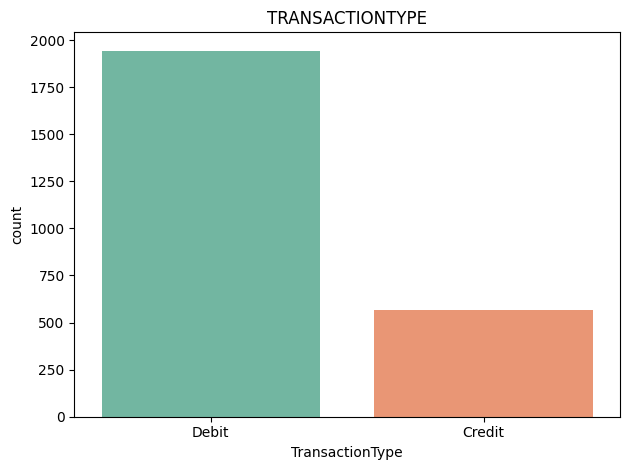

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64
------------------------------------------------------------------------



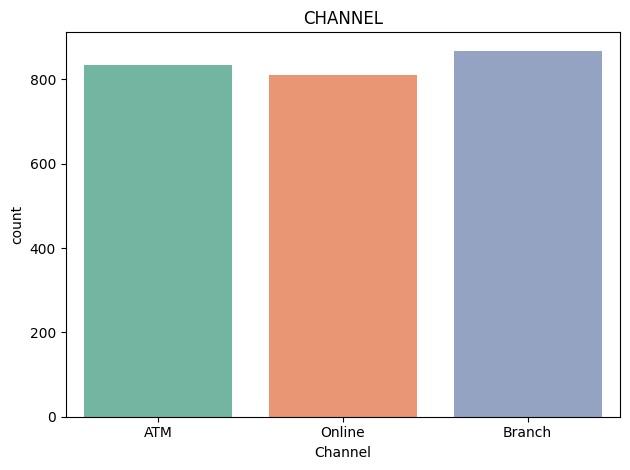

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64
------------------------------------------------------------------------



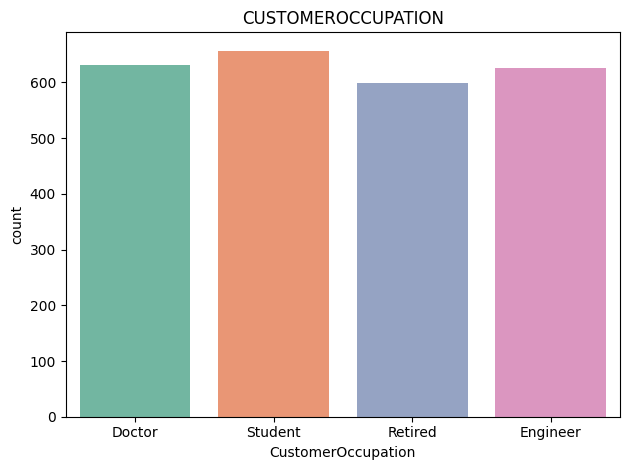

CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64
------------------------------------------------------------------------



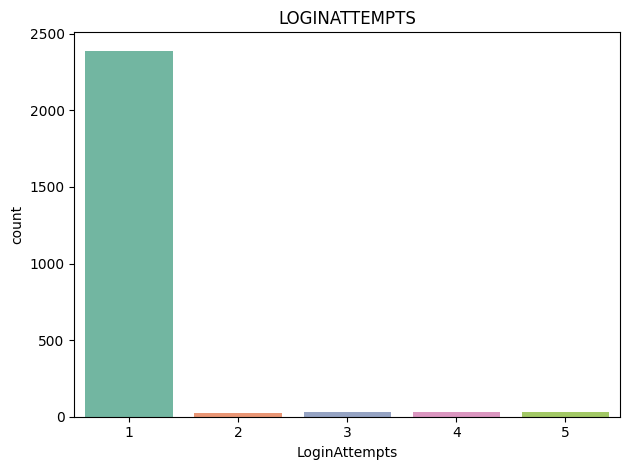

LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64
------------------------------------------------------------------------



In [17]:
for col in cats:
    count_plot(df,col)

In [18]:
def histplot(dataframe,colname):
    sns.histplot(data=dataframe,x=colname,kde=True)
    plt.title(colname.upper())
    plt.show()
    print("---------------------------------------------------------------------------",end="\n\n")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


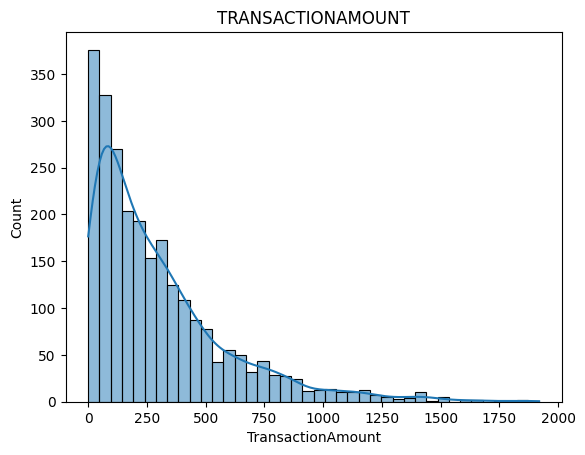

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


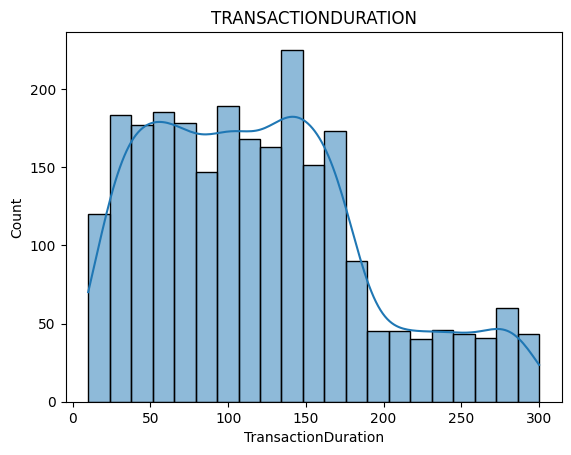

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


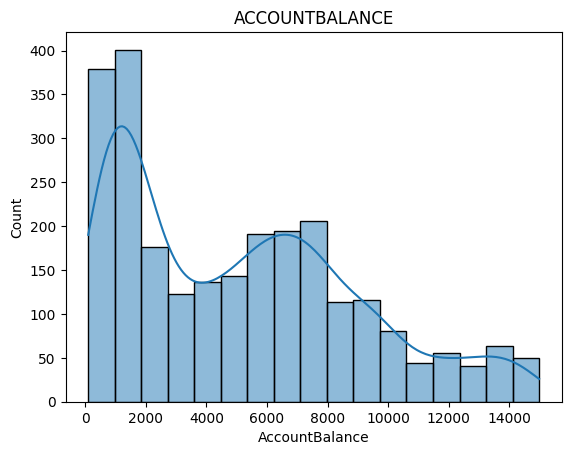

---------------------------------------------------------------------------



In [19]:
for col in nums:
    histplot(df,col)

In [20]:
def boxplot(dataframe,colname):
    sns.boxplot(data=dataframe,x=colname,palette="inferno")
    plt.title(colname.upper())
    plt.tight_layout()
    plt.show()
    print("-------------------------------------------------------------------------------------",end="\n\n")
    

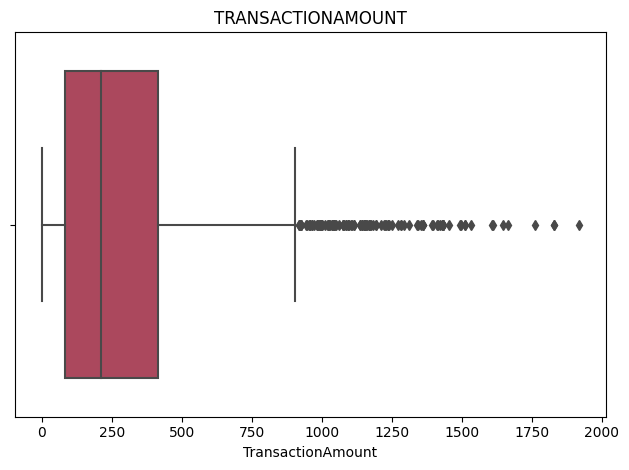

-------------------------------------------------------------------------------------



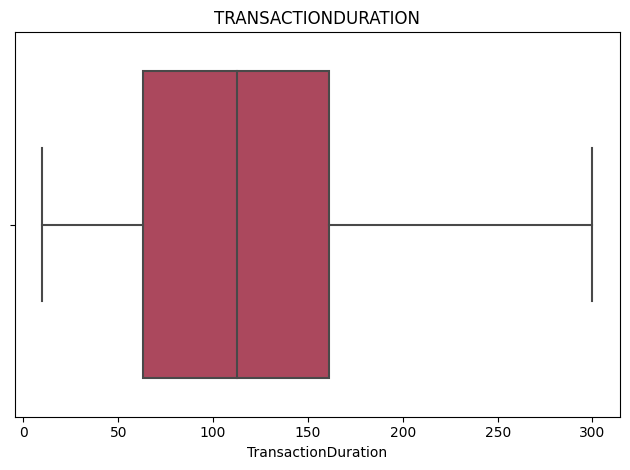

-------------------------------------------------------------------------------------



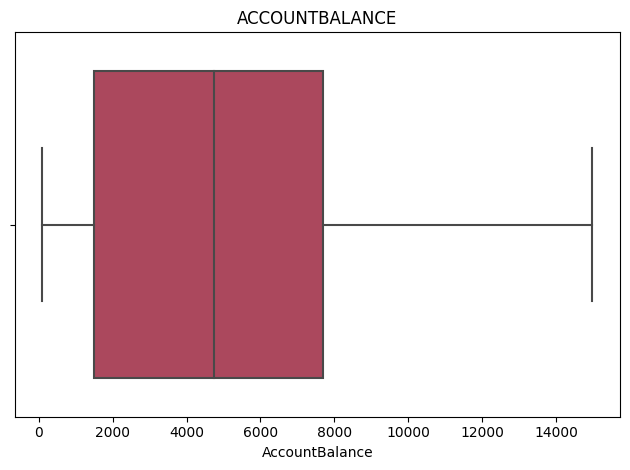

-------------------------------------------------------------------------------------



In [21]:
for col in nums:
    boxplot(df,col)

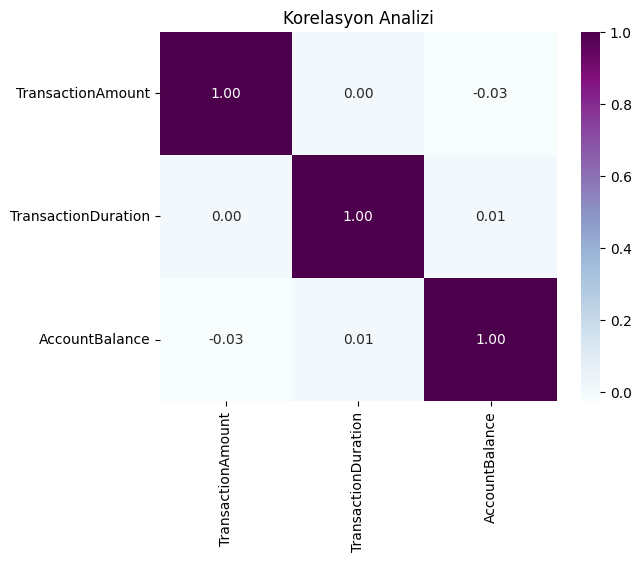

In [22]:
sns.heatmap(df[nums].corr(),annot=True,fmt=".2f",cmap="BuPu")
plt.title("Korelasyon Analizi")
plt.show()

In [23]:
df_num = df.select_dtypes(include=["float64","int64"])

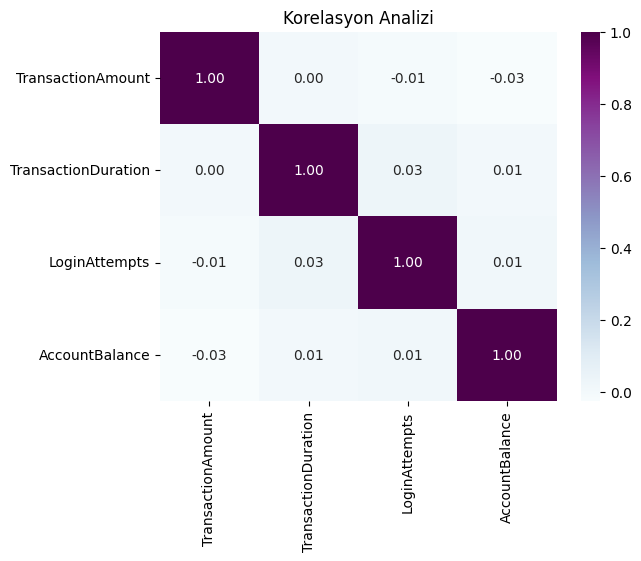

In [24]:
sns.heatmap(df_num.corr(),annot=True,fmt=".2f",cmap="BuPu")
plt.title("Korelasyon Analizi")
plt.show()

# Ayrkı Değerlere IQR Baskılama Yönetmi Kullanımı

In [25]:
def baskılama(dataframe,col_name,q1=0.25,q3=0.75):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3+1.5*interquantile_range
    low_limit =quantile1-1.5*interquantile_range
    return low_limit,up_limit
    

**Çeyrek açıklığını hesaplıyoruz**

In [26]:
baskılama(df,'TransactionAmount',q1=0.25,q3=0.75)

(-417.07875000000007, 913.49125)

In [27]:
def replace_with_thresholds(df, col_name):
    # Alt ve üst sınırları bul
    low_limit, up_limit = baskılama(df, col_name)
    
    # Aykırı değerleri alt ve üst sınırlara çek
    df.loc[df[col_name] < low_limit, col_name] = low_limit
    df.loc[df[col_name] > up_limit, col_name] = up_limit

In [28]:
replace_with_thresholds(df,'TransactionAmount')

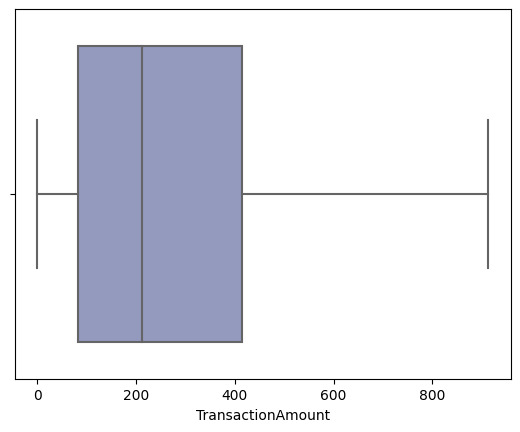

In [29]:
sns.boxplot(data=df,x='TransactionAmount',palette='BuPu')
plt.show()

**Baskılama sonrası tekrardan  kontrollerimizi sağlıyoruz**

In [30]:
veritürleri(df,head=True)

-------------------------------------SHAPE---------------------------------------
(2512, 16)
-------------------------------------INFO----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   object 
 11  CustomerOcc

,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000
mean,284.847250,119.643312,1.124602,5114.302966
std,252.067285,69.963757,0.602662,3900.942499
min,0.260000,10.000000,1.000000,101.250000
25%,81.885000,63.000000,1.000000,1504.370000
50%,211.140000,112.500000,1.000000,4735.510000
75%,414.527500,161.000000,1.000000,7678.820000
max,913.491250,300.000000,5.000000,14977.990000


-------------------------------------HEAD----------------------------------------


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


-------------------------------------TAİL----------------------------------------


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22
2511,TX002512,AC00009,243.08,2023-02-14 16:21:23,Credit,Jacksonville,D000215,59.127.135.25,M041,Online,24,Student,93,1,131.25,2024-11-04 08:07:49


# Nümerik Değişkenlerin Dağılımı

In [31]:
nums

['TransactionAmount', 'TransactionDuration', 'AccountBalance']

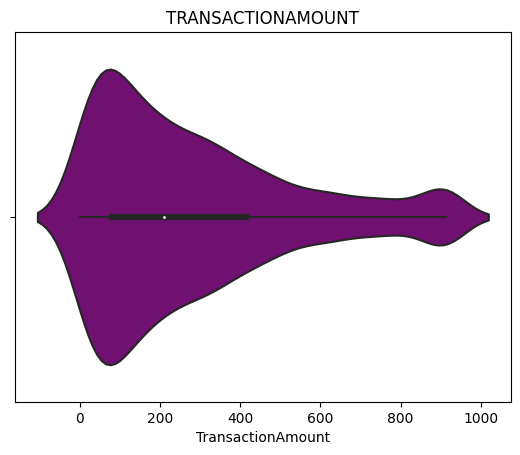

---------------------------------------------------------------------------------------------------



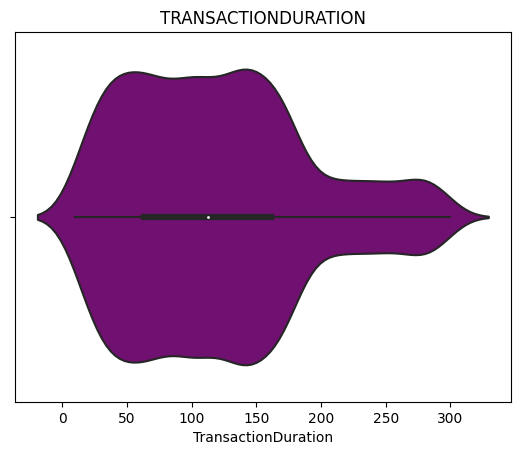

---------------------------------------------------------------------------------------------------



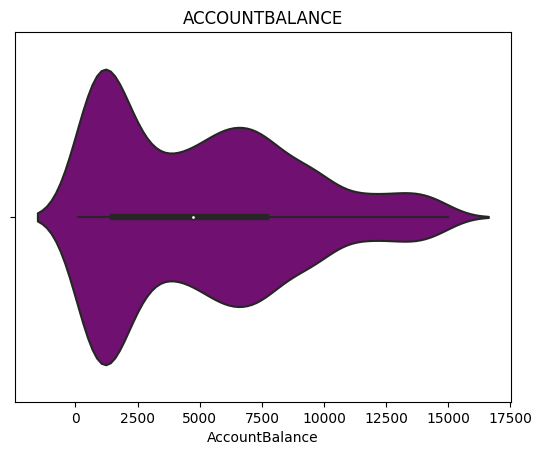

---------------------------------------------------------------------------------------------------



In [32]:
for col in nums:
    sns.violinplot(data=df,x=col,shade=True,color='purple')
    plt.title(col.upper())
    plt.show()
    print("---------------------------------------------------------------------------------------------------",end="\n\n")

/tmp/ipykernel_17/2063970.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,color='purple')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


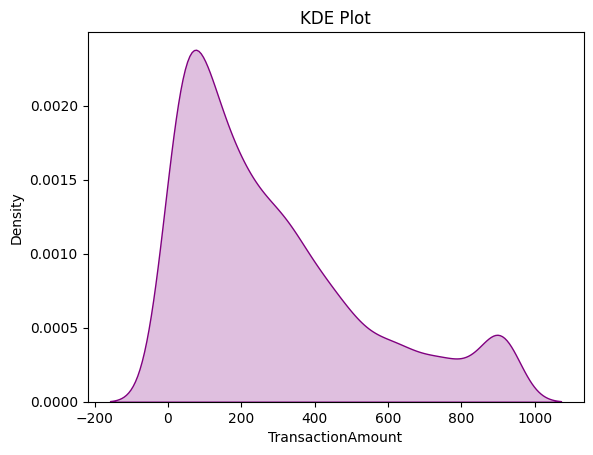

---------------------------------------------------------------------------------------------------



/tmp/ipykernel_17/2063970.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,color='purple')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


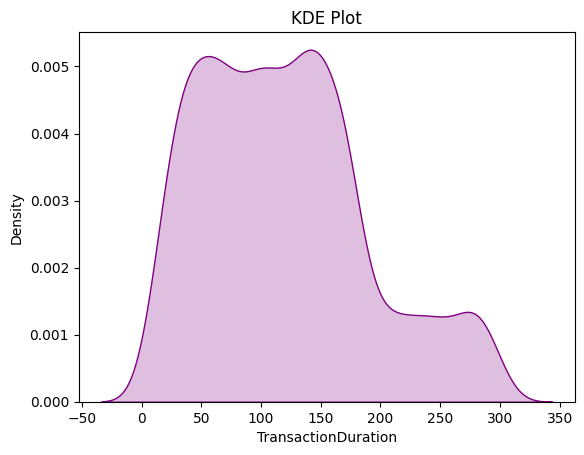

---------------------------------------------------------------------------------------------------



/tmp/ipykernel_17/2063970.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,color='purple')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


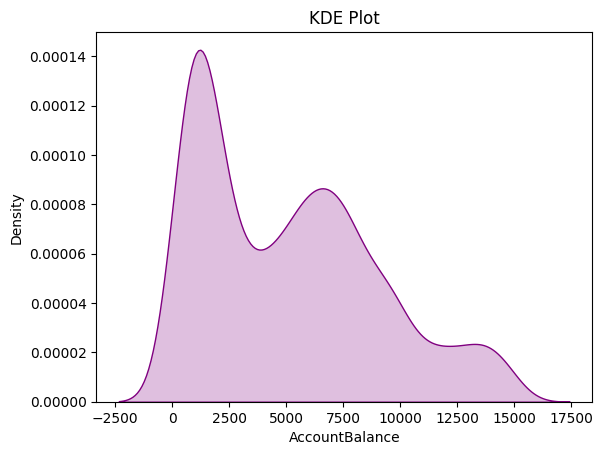

---------------------------------------------------------------------------------------------------



In [33]:
for col in nums:
    sns.kdeplot(data=df,x=col,shade=True,color='purple')
    plt.title('KDE Plot')
    plt.show()
    print("---------------------------------------------------------------------------------------------------",end="\n\n")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


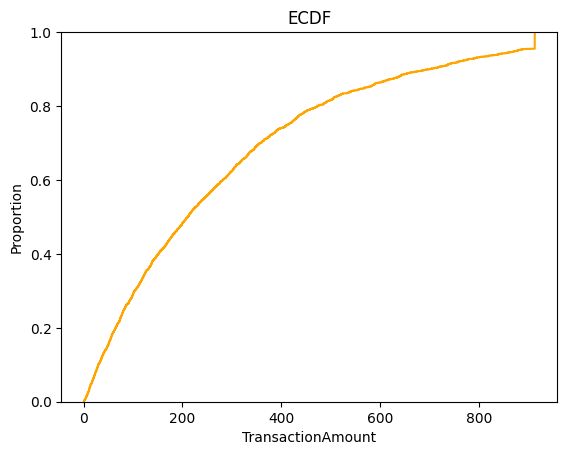

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


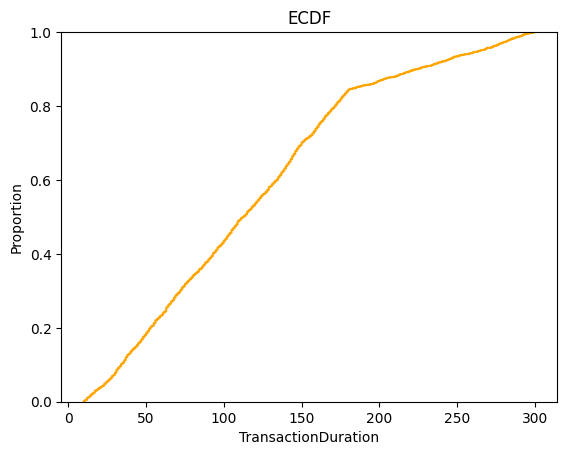

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


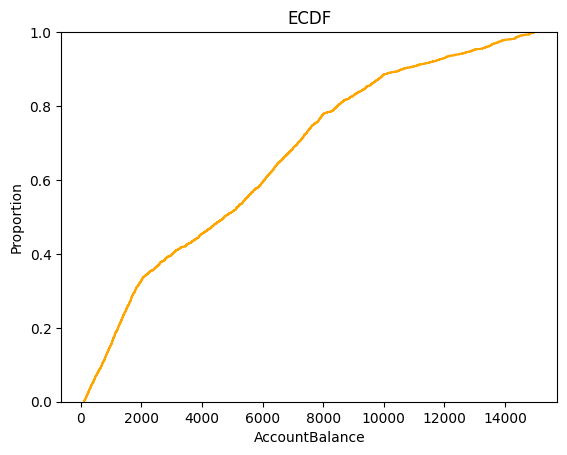

In [34]:
for col in nums:
    sns.ecdfplot(data=df,x=col,color='orange')
    plt.title("ECDF")
    plt.show()

# Kategorik Değişkenlerin İncelenmesi

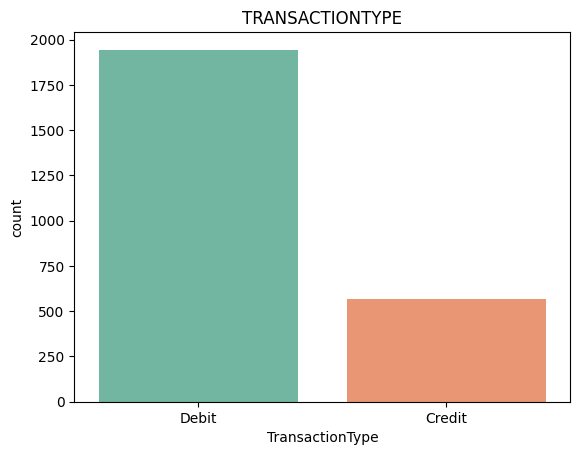

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64
-------------------------------------------------------------------------------------------



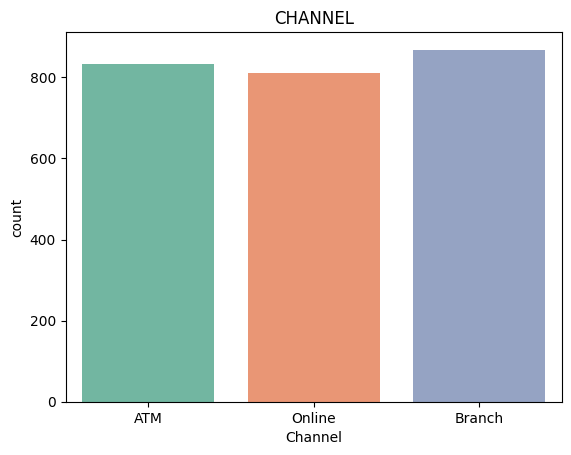

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64
-------------------------------------------------------------------------------------------



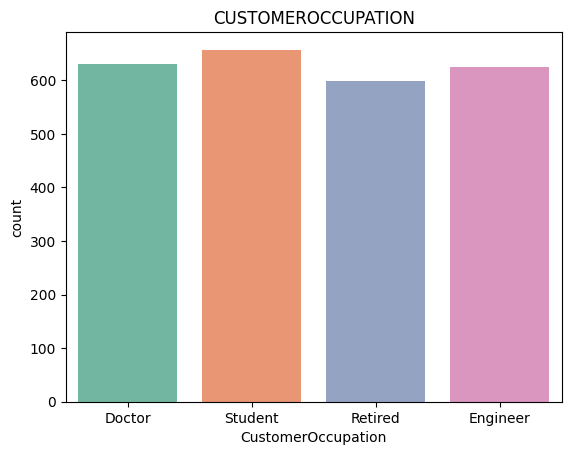

CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64
-------------------------------------------------------------------------------------------



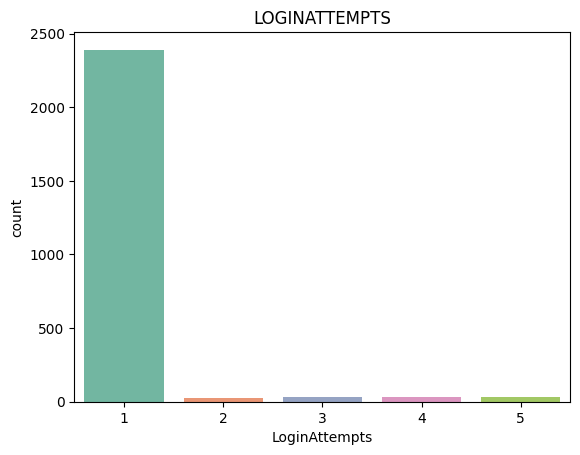

LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64
-------------------------------------------------------------------------------------------



In [35]:
for col in cats:
    sns.countplot(data=df,x=col,palette='Set2')
    plt.title(col.upper())
    plt.show()
    print(df[col].value_counts())
    print("-------------------------------------------------------------------------------------------",end="\n\n")
    

# KEŞİFSEL VERİ ANALİZİ(EDA)

**En Fazla Tutarda İşlem Gerçekleştiren Şehirler**

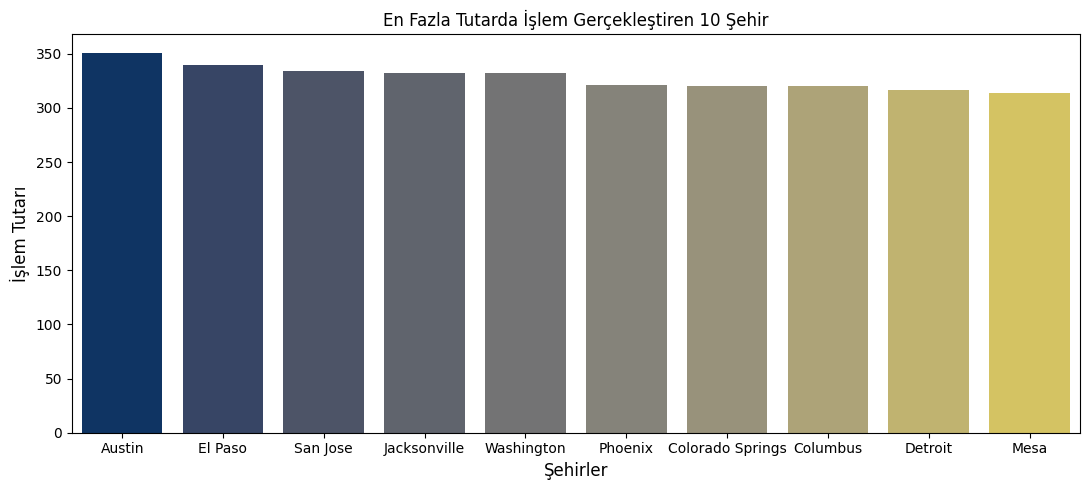

In [36]:
işlem_tutarı_fazla_olan_şehirler= df.groupby("Location",as_index=False)[["TransactionAmount"]].mean().sort_values(by="TransactionAmount",ascending=False).head(10)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="Location",y="TransactionAmount",data=işlem_tutarı_fazla_olan_şehirler,palette="cividis")
plt.title("En Fazla Tutarda İşlem Gerçekleştiren 10 Şehir",fontsize=12)
plt.xlabel("Şehirler",fontsize=12)
plt.ylabel("İşlem Tutarı",fontsize=12)
plt.tight_layout()
plt.show()

**En Az Tutarda İşlem Gerçekleştiren Şehirler**

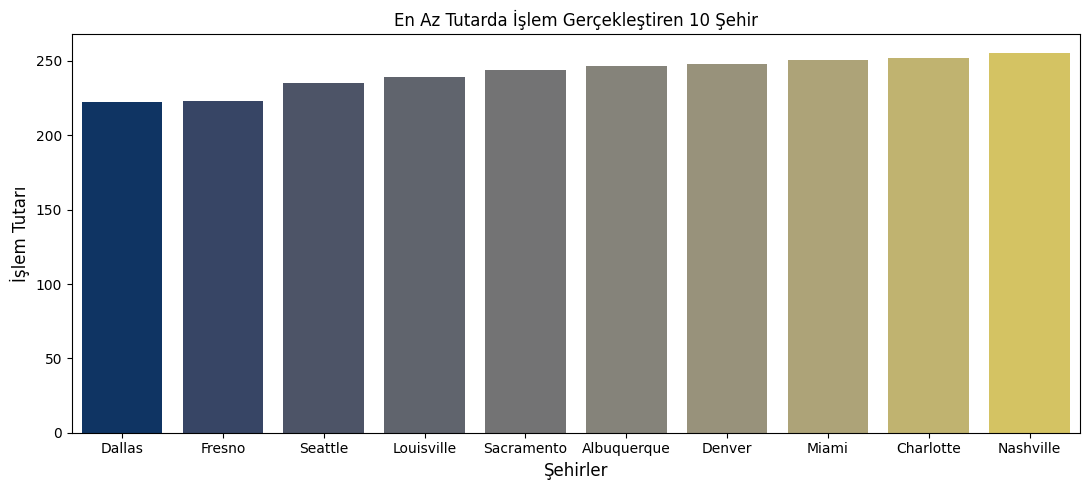

In [37]:
işlem_tutarı_az_olan_şehirler = df.groupby("Location",as_index=False)[["TransactionAmount"]].mean().sort_values(by="TransactionAmount").head(10)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="Location",y="TransactionAmount",data=işlem_tutarı_az_olan_şehirler,palette="cividis")
plt.title("En Az Tutarda İşlem Gerçekleştiren 10 Şehir",fontsize=12)
plt.xlabel("Şehirler",fontsize=12)
plt.ylabel("İşlem Tutarı",fontsize=12)
plt.tight_layout()
plt.show()

**İşlem Gerçekleştiren Mesleklerin Tutar Bazında İncelenmesi**

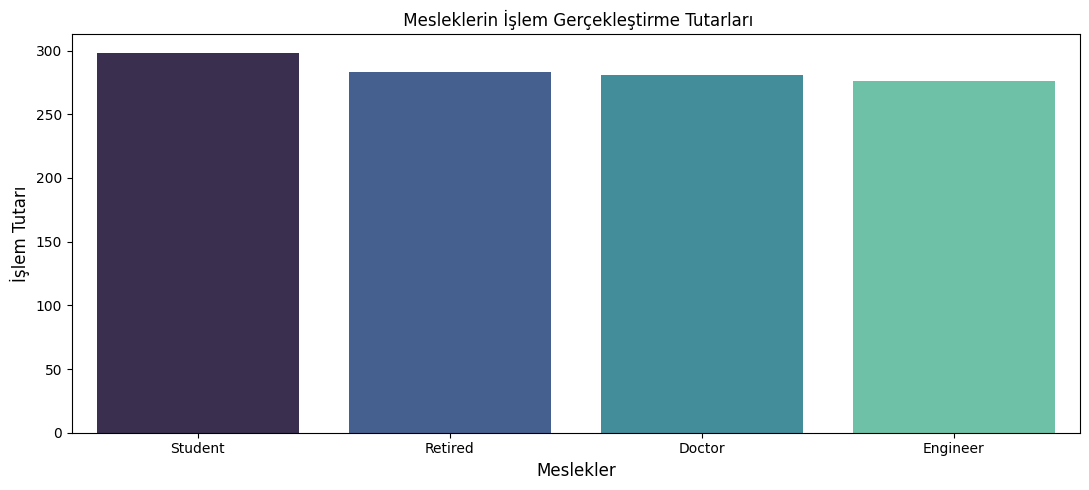

In [38]:
işlem_tutarı_fazla_olan_meslekler= df.groupby("CustomerOccupation",as_index=False)[["TransactionAmount"]].mean().sort_values(by="TransactionAmount",ascending=False)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="CustomerOccupation",y="TransactionAmount",data=işlem_tutarı_fazla_olan_meslekler,palette="mako")
plt.title(" Mesleklerin İşlem Gerçekleştirme Tutarları",fontsize=12)
plt.xlabel("Meslekler",fontsize=12)
plt.ylabel("İşlem Tutarı",fontsize=12)
plt.tight_layout()
plt.show()

**Mesleklerin Oturum Açarken Deneme Sayıları**

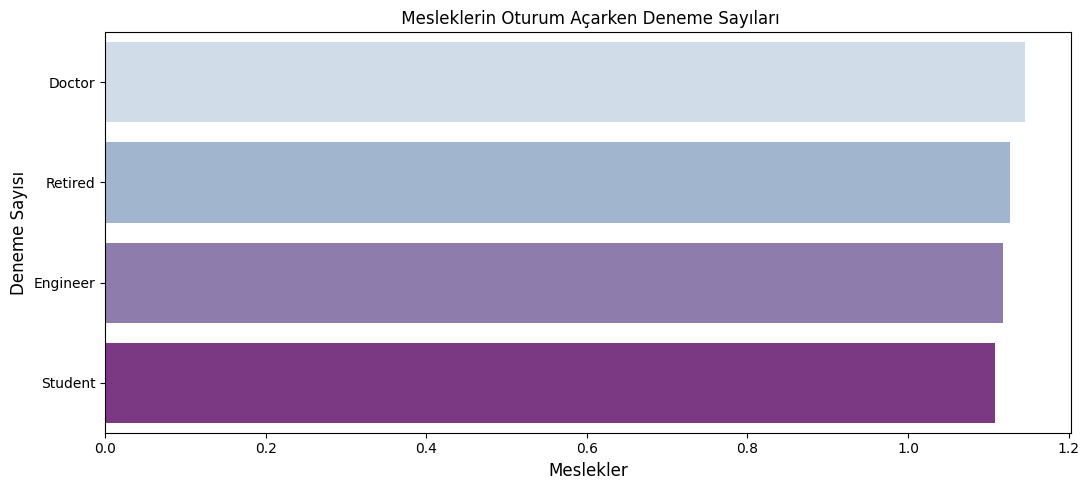

In [39]:
meselekler_deneme_sayısı= df.groupby("CustomerOccupation",as_index=False)[["LoginAttempts"]].mean().sort_values(by="LoginAttempts",ascending=False)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="LoginAttempts",y="CustomerOccupation",data=meselekler_deneme_sayısı,palette="BuPu")
plt.title(" Mesleklerin Oturum Açarken Deneme Sayıları",fontsize=12)
plt.xlabel("Meslekler",fontsize=12)
plt.ylabel("Deneme Sayısı",fontsize=12)
plt.tight_layout()
plt.show()

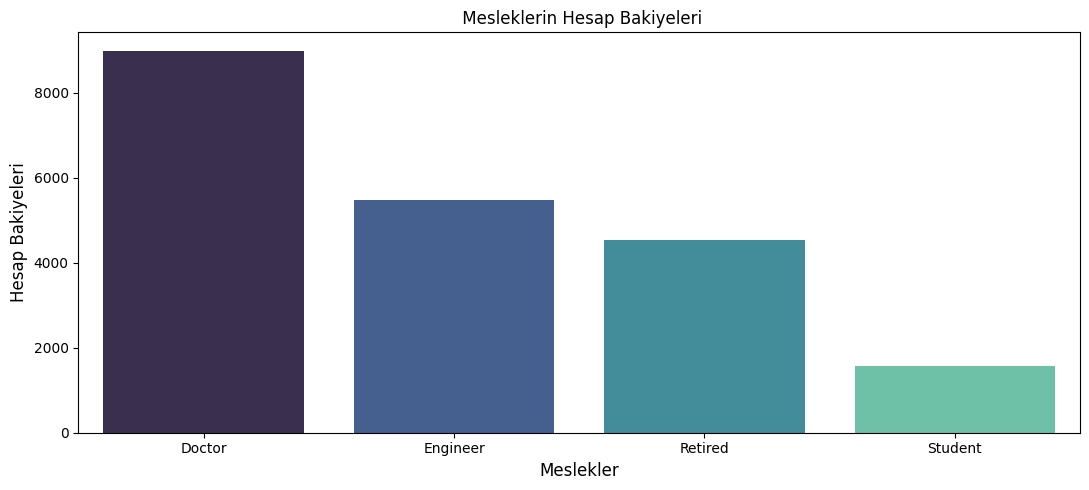

In [40]:
hesap_bakiyesi_meslekler= df.groupby("CustomerOccupation",as_index=False)[["AccountBalance"]].mean().sort_values(by="AccountBalance",ascending=False)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="CustomerOccupation",y="AccountBalance",data=hesap_bakiyesi_meslekler,palette="mako")
plt.title(" Mesleklerin Hesap Bakiyeleri",fontsize=12)
plt.xlabel("Meslekler",fontsize=12)
plt.ylabel("Hesap Bakiyeleri",fontsize=12)
plt.tight_layout()
plt.show()

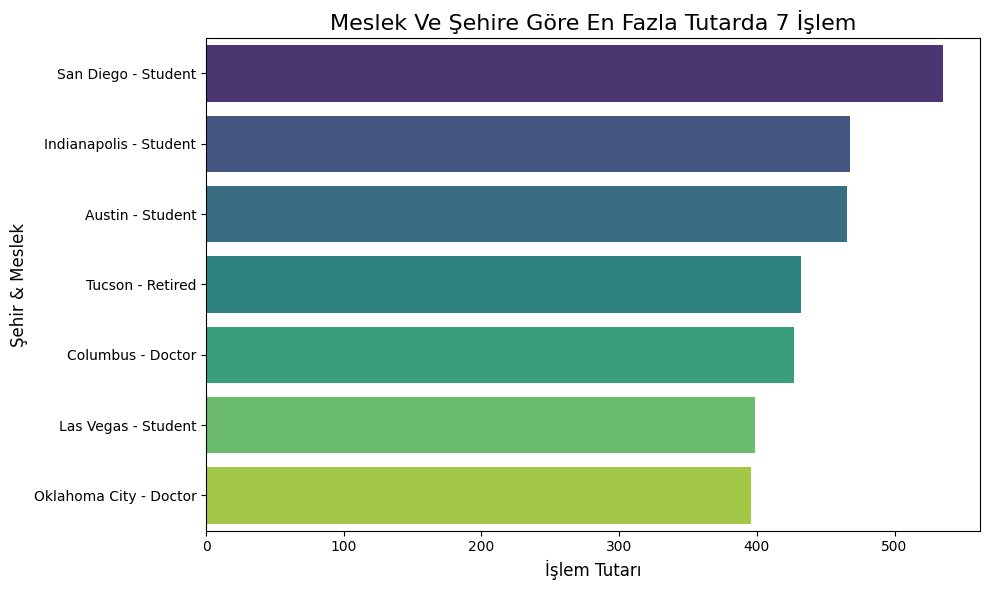

In [41]:
meslek_konum_işlem = df.groupby(["Location","CustomerOccupation"],as_index=False)["TransactionAmount"].mean().sort_values(by="TransactionAmount",ascending=False).head(7)
meslek_konum_işlem['yas_meslek'] = meslek_konum_işlem['Location'] + " - " + meslek_konum_işlem['CustomerOccupation']

plt.figure(figsize=(10, 6))
sns.barplot(x="TransactionAmount", y="yas_meslek", data=meslek_konum_işlem, palette="viridis")


plt.title("Meslek Ve Şehire Göre En Fazla Tutarda 7 İşlem", fontsize=16)
plt.xlabel("İşlem Tutarı", fontsize=12)
plt.ylabel("Şehir & Meslek", fontsize=12)

plt.tight_layout()
plt.show()

**Burda grafiğe baktığımızda şaşırtıcı bir şekilde şehir bazında toplam işlem tutarında en hit olan şehirler grafikte neredeyse yok denecek kadar  az.**

**Meslek Ve İşlem Türüne  Göre En Fazla Tutarda Yedi İşlem**

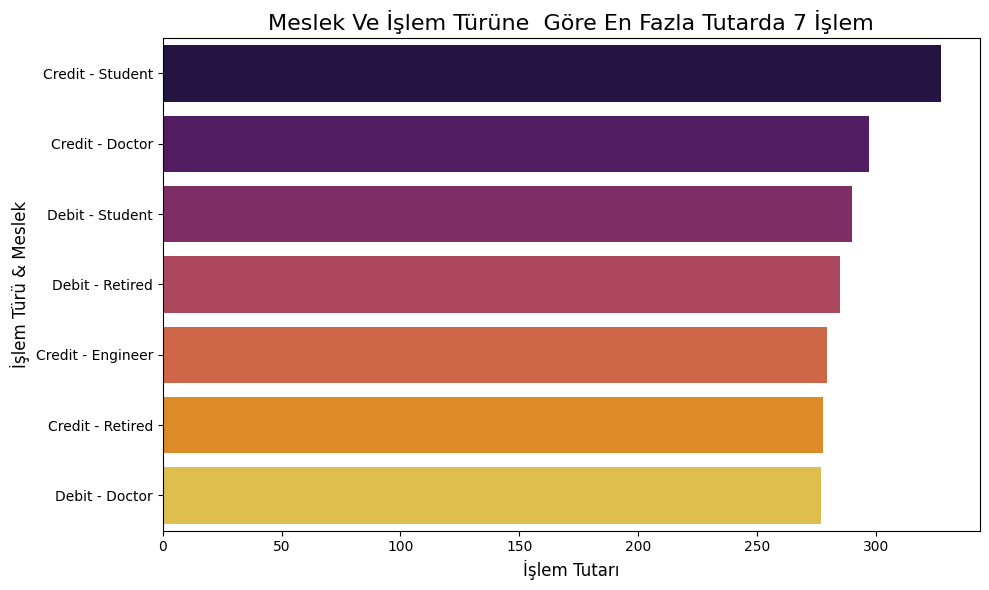

In [42]:
meslek_türü_işlem = df.groupby(["TransactionType","CustomerOccupation"],as_index=False)["TransactionAmount"].mean().sort_values(by="TransactionAmount",ascending=False).head(7)
meslek_türü_işlem['işlemtürü_meslek'] = meslek_türü_işlem['TransactionType'] + " - " + meslek_türü_işlem['CustomerOccupation']

plt.figure(figsize=(10, 6))
sns.barplot(x="TransactionAmount", y="işlemtürü_meslek", data=meslek_türü_işlem, palette="inferno")


plt.title("Meslek Ve İşlem Türüne  Göre En Fazla Tutarda 7 İşlem", fontsize=16)
plt.xlabel("İşlem Tutarı", fontsize=12)
plt.ylabel("İşlem Türü & Meslek", fontsize=12)

plt.tight_layout()
plt.show()

**İşlem Kanalı,Türüne Ve Mesleğine Göre En Fazla Tutarda 7 İşlem**

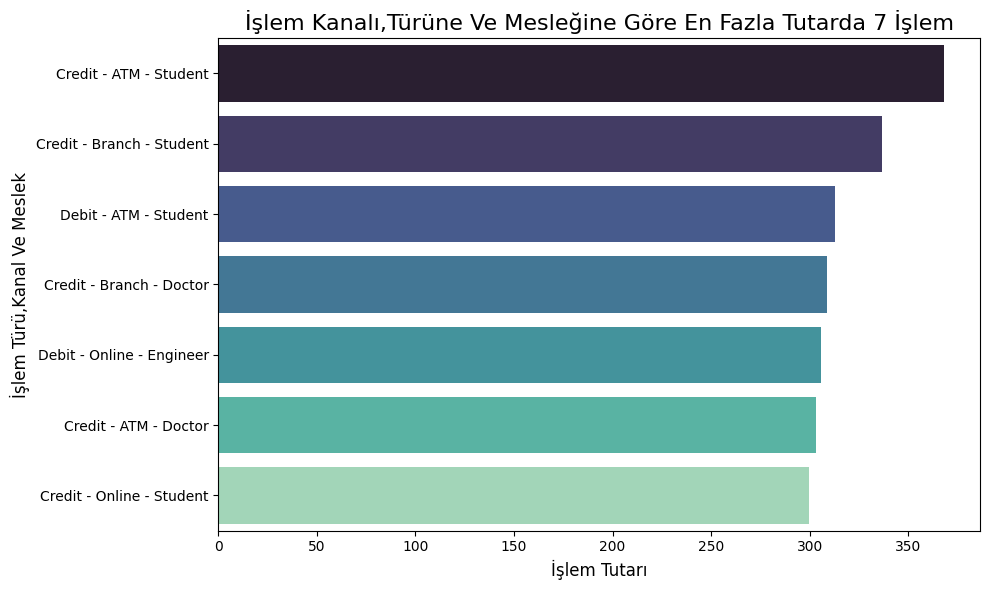

In [43]:
meslek_türü_işlem = df.groupby(["TransactionType","Channel","CustomerOccupation"],as_index=False)["TransactionAmount"].mean().sort_values(by="TransactionAmount",ascending=False).head(7)
meslek_türü_işlem['işlemtürü_işlemkanalı'] = meslek_türü_işlem['TransactionType'] + " - " + meslek_türü_işlem['Channel']+ " - "+meslek_türü_işlem['CustomerOccupation']

plt.figure(figsize=(10, 6))
sns.barplot(x="TransactionAmount", y="işlemtürü_işlemkanalı", data=meslek_türü_işlem, palette="mako")


plt.title("İşlem Kanalı,Türüne Ve Mesleğine Göre En Fazla Tutarda 7 İşlem", fontsize=16)
plt.xlabel("İşlem Tutarı", fontsize=12)
plt.ylabel("İşlem Türü,Kanal Ve Meslek", fontsize=12)

plt.tight_layout()
plt.show()

**Bu grafikte ATM den işlem yapan öğrenci ve en yüksek miktarda  işlem gerçekleştiren de  öğrenci normal olarak çok objektif bir durum değil bu yüzden fraud işlemi olabilme ihitimaline karşı dikkat edilmesi gereken bir öngörü.!!**

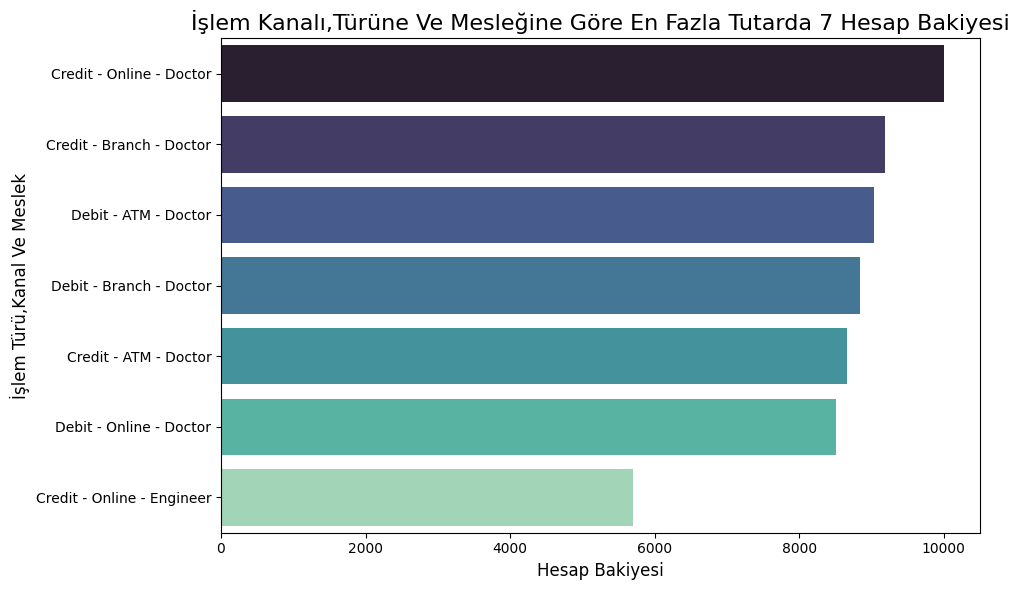

In [44]:
meslek_türü_işlem = df.groupby(["TransactionType","Channel","CustomerOccupation"],as_index=False)["AccountBalance"].mean().sort_values(by="AccountBalance",ascending=False).head(7)
meslek_türü_işlem['işlemtürü_işlemkanalı'] = meslek_türü_işlem['TransactionType'] + " - " + meslek_türü_işlem['Channel']+ " - "+meslek_türü_işlem['CustomerOccupation']

plt.figure(figsize=(10, 6))
sns.barplot(x="AccountBalance", y="işlemtürü_işlemkanalı", data=meslek_türü_işlem, palette="mako")


plt.title("İşlem Kanalı,Türüne Ve Mesleğine Göre En Fazla Tutarda 7 Hesap Bakiyesi", fontsize=16)
plt.xlabel("Hesap Bakiyesi", fontsize=12)
plt.ylabel("İşlem Türü,Kanal Ve Meslek", fontsize=12)

plt.tight_layout()
plt.show()

**Hesap bakiyesi en fazla doktorda olamasında rağmen işlem tutarı olarak  öğrencilerin ön planda olması  dikkat edilmesi gereken bir husus!!**

**İşlem Kanalı,Türüne Ve Mesleğine Göre En Fazla Tutarda Yedi İşlem Süresi**

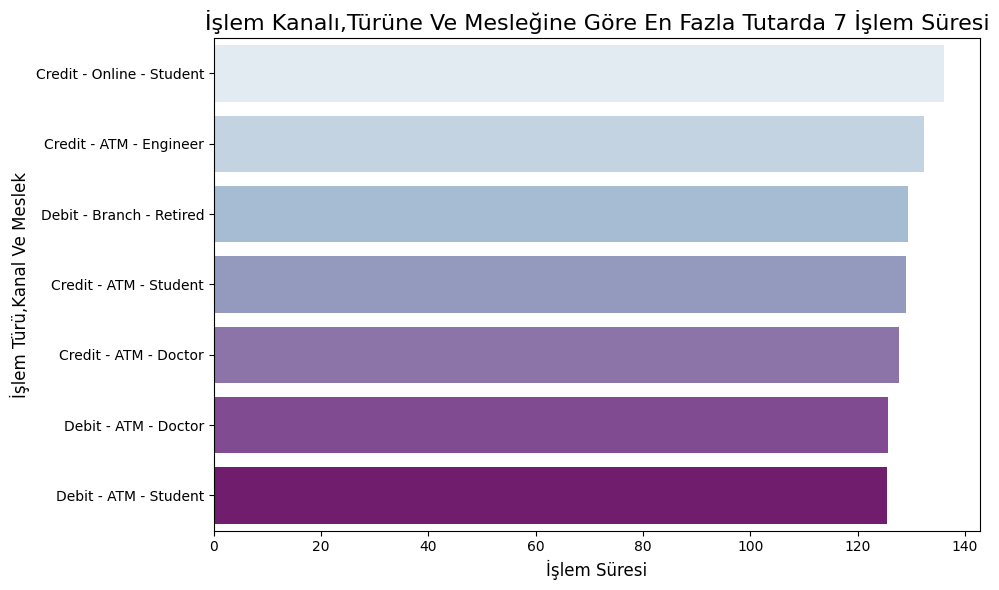

In [45]:
meslek_türü_işlem = df.groupby(["TransactionType","Channel","CustomerOccupation"],as_index=False)["TransactionDuration"].mean().sort_values(by="TransactionDuration",ascending=False).head(7)
meslek_türü_işlem['işlemtürü_işlemkanalı'] = meslek_türü_işlem['TransactionType'] + " - " + meslek_türü_işlem['Channel']+ " - "+meslek_türü_işlem['CustomerOccupation']

plt.figure(figsize=(10, 6))
sns.barplot(x="TransactionDuration", y="işlemtürü_işlemkanalı", data=meslek_türü_işlem, palette="BuPu")


plt.title("İşlem Kanalı,Türüne Ve Mesleğine Göre En Fazla Tutarda 7 İşlem Süresi", fontsize=16)
plt.xlabel("İşlem Süresi", fontsize=12)
plt.ylabel("İşlem Türü,Kanal Ve Meslek", fontsize=12)

plt.tight_layout()
plt.show()

**İşlem Kanalı,Türüne Ve Mesleğine Göre En Fazla 7 Oturum Açma Denemesi**

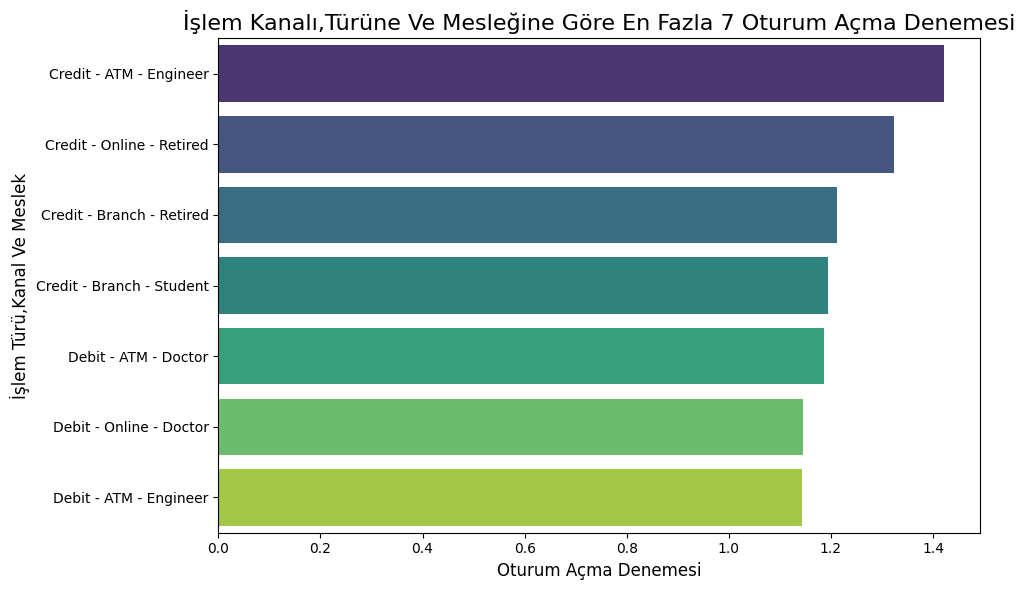

In [46]:
meslek_türü_işlem = df.groupby(["TransactionType","Channel","CustomerOccupation"],as_index=False)["LoginAttempts"].mean().sort_values(by="LoginAttempts",ascending=False).head(7)
meslek_türü_işlem['işlemtürü_işlemkanalı'] = meslek_türü_işlem['TransactionType'] + " - " + meslek_türü_işlem['Channel']+ " - "+meslek_türü_işlem['CustomerOccupation']

plt.figure(figsize=(10, 6))
sns.barplot(x="LoginAttempts", y="işlemtürü_işlemkanalı", data=meslek_türü_işlem, palette="viridis")


plt.title("İşlem Kanalı,Türüne Ve Mesleğine Göre En Fazla 7 Oturum Açma Denemesi", fontsize=16)
plt.xlabel("Oturum Açma Denemesi", fontsize=12)
plt.ylabel("İşlem Türü,Kanal Ve Meslek", fontsize=12)

plt.tight_layout()
plt.show()

**İşlemin Gerçekleştiği Kanala Göre İşlem Tutarları**

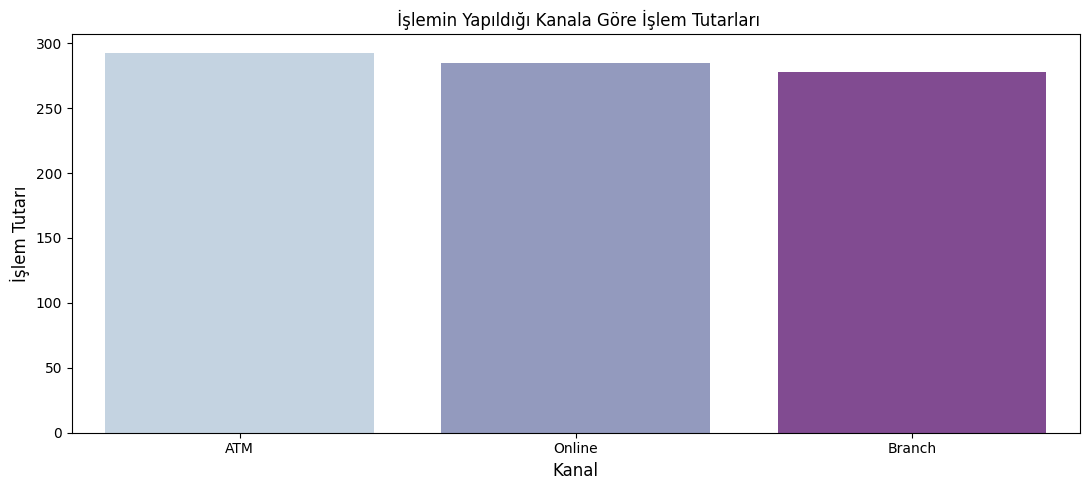

In [47]:
hesap_bakiyesi_meslekler= df.groupby("Channel",as_index=False)[["TransactionAmount"]].mean().sort_values(by="TransactionAmount",ascending=False)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="Channel",y="TransactionAmount",data=hesap_bakiyesi_meslekler,palette="BuPu")
plt.title(" İşlemin Yapıldığı Kanala Göre İşlem Tutarları",fontsize=12)
plt.xlabel("Kanal",fontsize=12)
plt.ylabel("İşlem Tutarı",fontsize=12)
plt.tight_layout()
plt.show()

**En hızlı işlem şubede gerçekleşiyor.!**

**Borç veya Alacak İşlem Türüne Göre İşlem Tutarları**

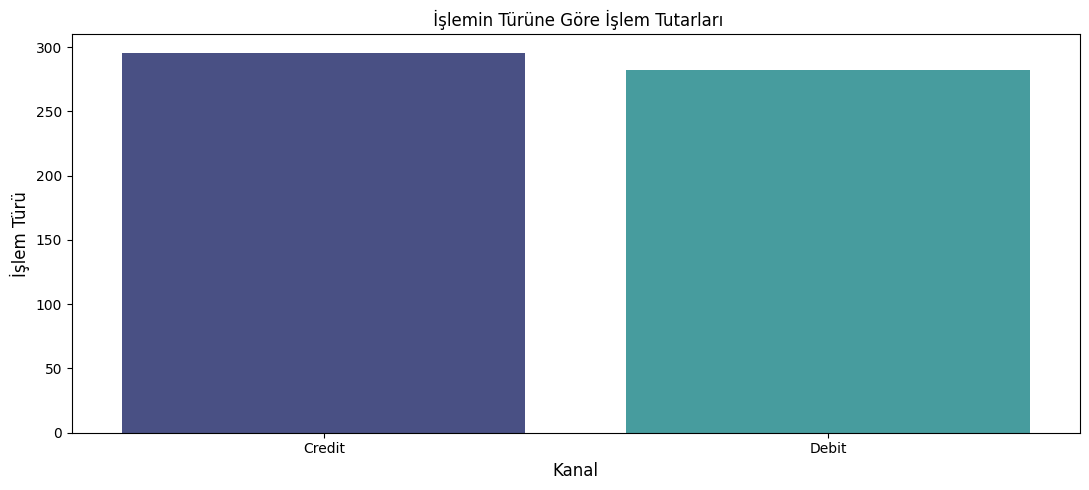

In [48]:
hesap_bakiyesi_meslekler= df.groupby("TransactionType",as_index=False)[["TransactionAmount"]].mean().sort_values(by="TransactionAmount",ascending=False)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="TransactionType",y="TransactionAmount",data=hesap_bakiyesi_meslekler,palette="mako")
plt.title(" İşlemin Türüne Göre İşlem Tutarları",fontsize=12)
plt.xlabel("Kanal",fontsize=12)
plt.ylabel("İşlem Türü",fontsize=12)
plt.tight_layout()
plt.show()

**Mesleklerin İşlem Tutarı,İşlem İçinde Geçirilen Süre,Oturum Açmak İçin Deneme Sayısı,Hesap Bakiyesi Faktörlerince İncelenmesi**

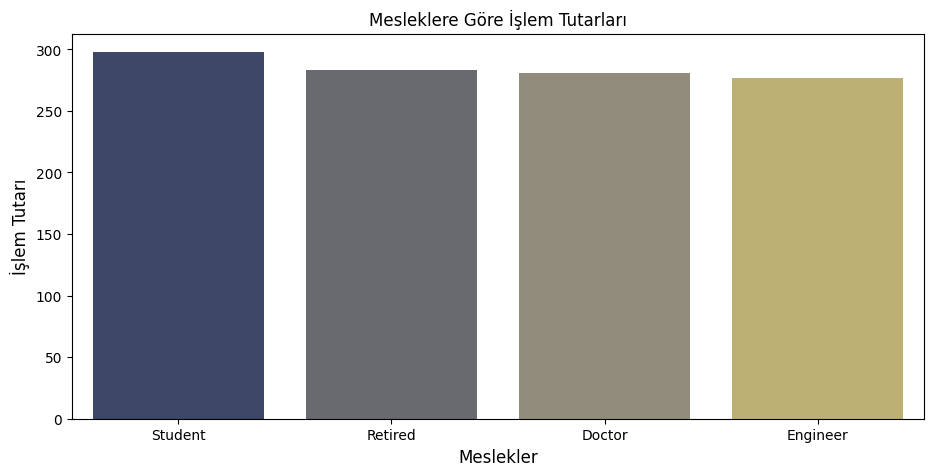

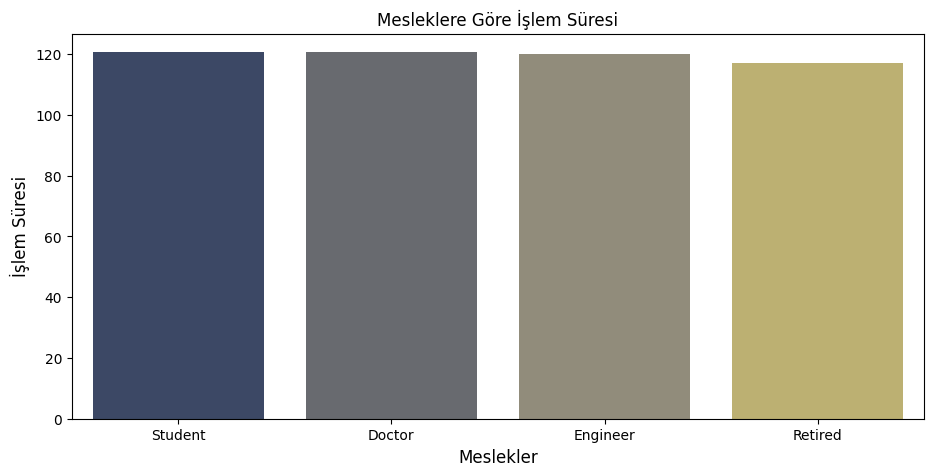

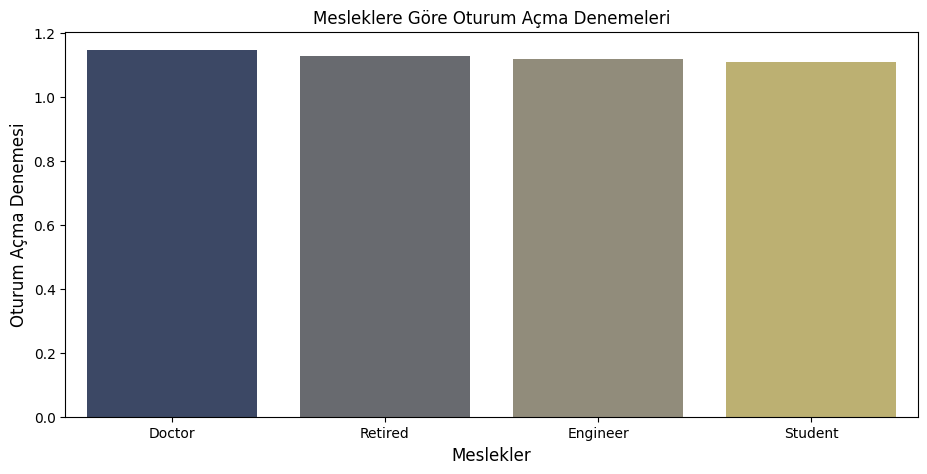

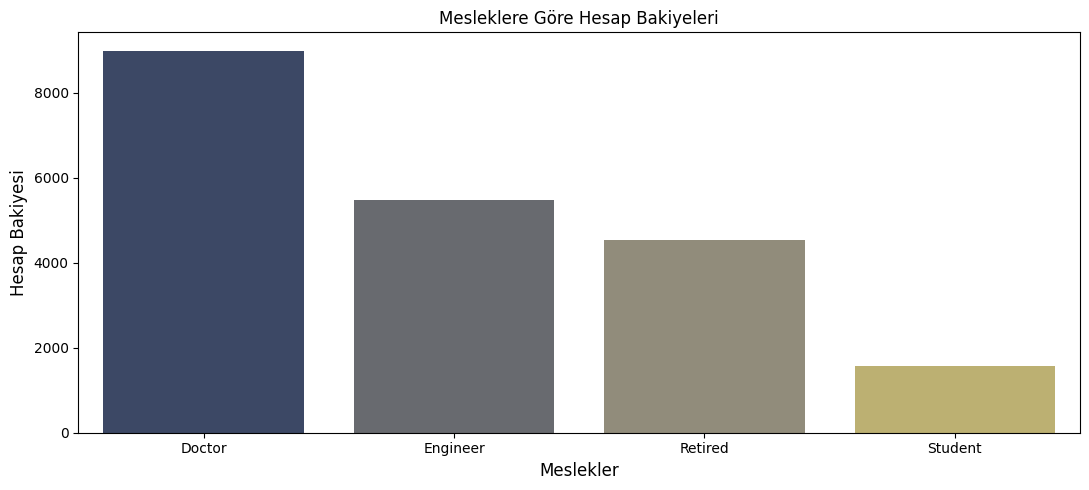

In [49]:
işlem_tutarı= df.groupby("CustomerOccupation",as_index=False)[["TransactionAmount"]].mean().sort_values(by="TransactionAmount",ascending=False).head(4)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="CustomerOccupation",y="TransactionAmount",data=işlem_tutarı,palette="cividis")
plt.title("Mesleklere Göre İşlem Tutarları",fontsize=12)
plt.xlabel("Meslekler",fontsize=12)
plt.ylabel("İşlem Tutarı",fontsize=12)

işlem_tutarı= df.groupby("CustomerOccupation",as_index=False)[["TransactionDuration"]].mean().sort_values(by="TransactionDuration",ascending=False).head(4)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="CustomerOccupation",y="TransactionDuration",data=işlem_tutarı,palette="cividis")
plt.title("Mesleklere Göre İşlem Süresi",fontsize=12)
plt.xlabel("Meslekler",fontsize=12)
plt.ylabel("İşlem Süresi",fontsize=12)

işlem_tutarı= df.groupby("CustomerOccupation",as_index=False)[["LoginAttempts"]].mean().sort_values(by="LoginAttempts",ascending=False).head(4)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="CustomerOccupation",y="LoginAttempts",data=işlem_tutarı,palette="cividis")
plt.title("Mesleklere Göre Oturum Açma Denemeleri",fontsize=12)
plt.xlabel("Meslekler",fontsize=12)
plt.ylabel("Oturum Açma Denemesi",fontsize=12)


işlem_tutarı= df.groupby("CustomerOccupation",as_index=False)[["AccountBalance"]].mean().sort_values(by="AccountBalance",ascending=False).head(4)
plt.figure(figsize=(11, 5 ))
sns.barplot(x="CustomerOccupation",y="AccountBalance",data=işlem_tutarı,palette="cividis")
plt.title("Mesleklere Göre Hesap Bakiyeleri",fontsize=12)
plt.xlabel("Meslekler",fontsize=12)
plt.ylabel("Hesap Bakiyesi",fontsize=12)

plt.tight_layout()
plt.show()




**Öğrenci Meslek Grubuna Ait İşlem Tutarı,İşlem Deneme Sayısı,İşlem Süresi,Hesap Bakiyesini Yakından İnceleyelim Ve Dağılımlarına Bakalım**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


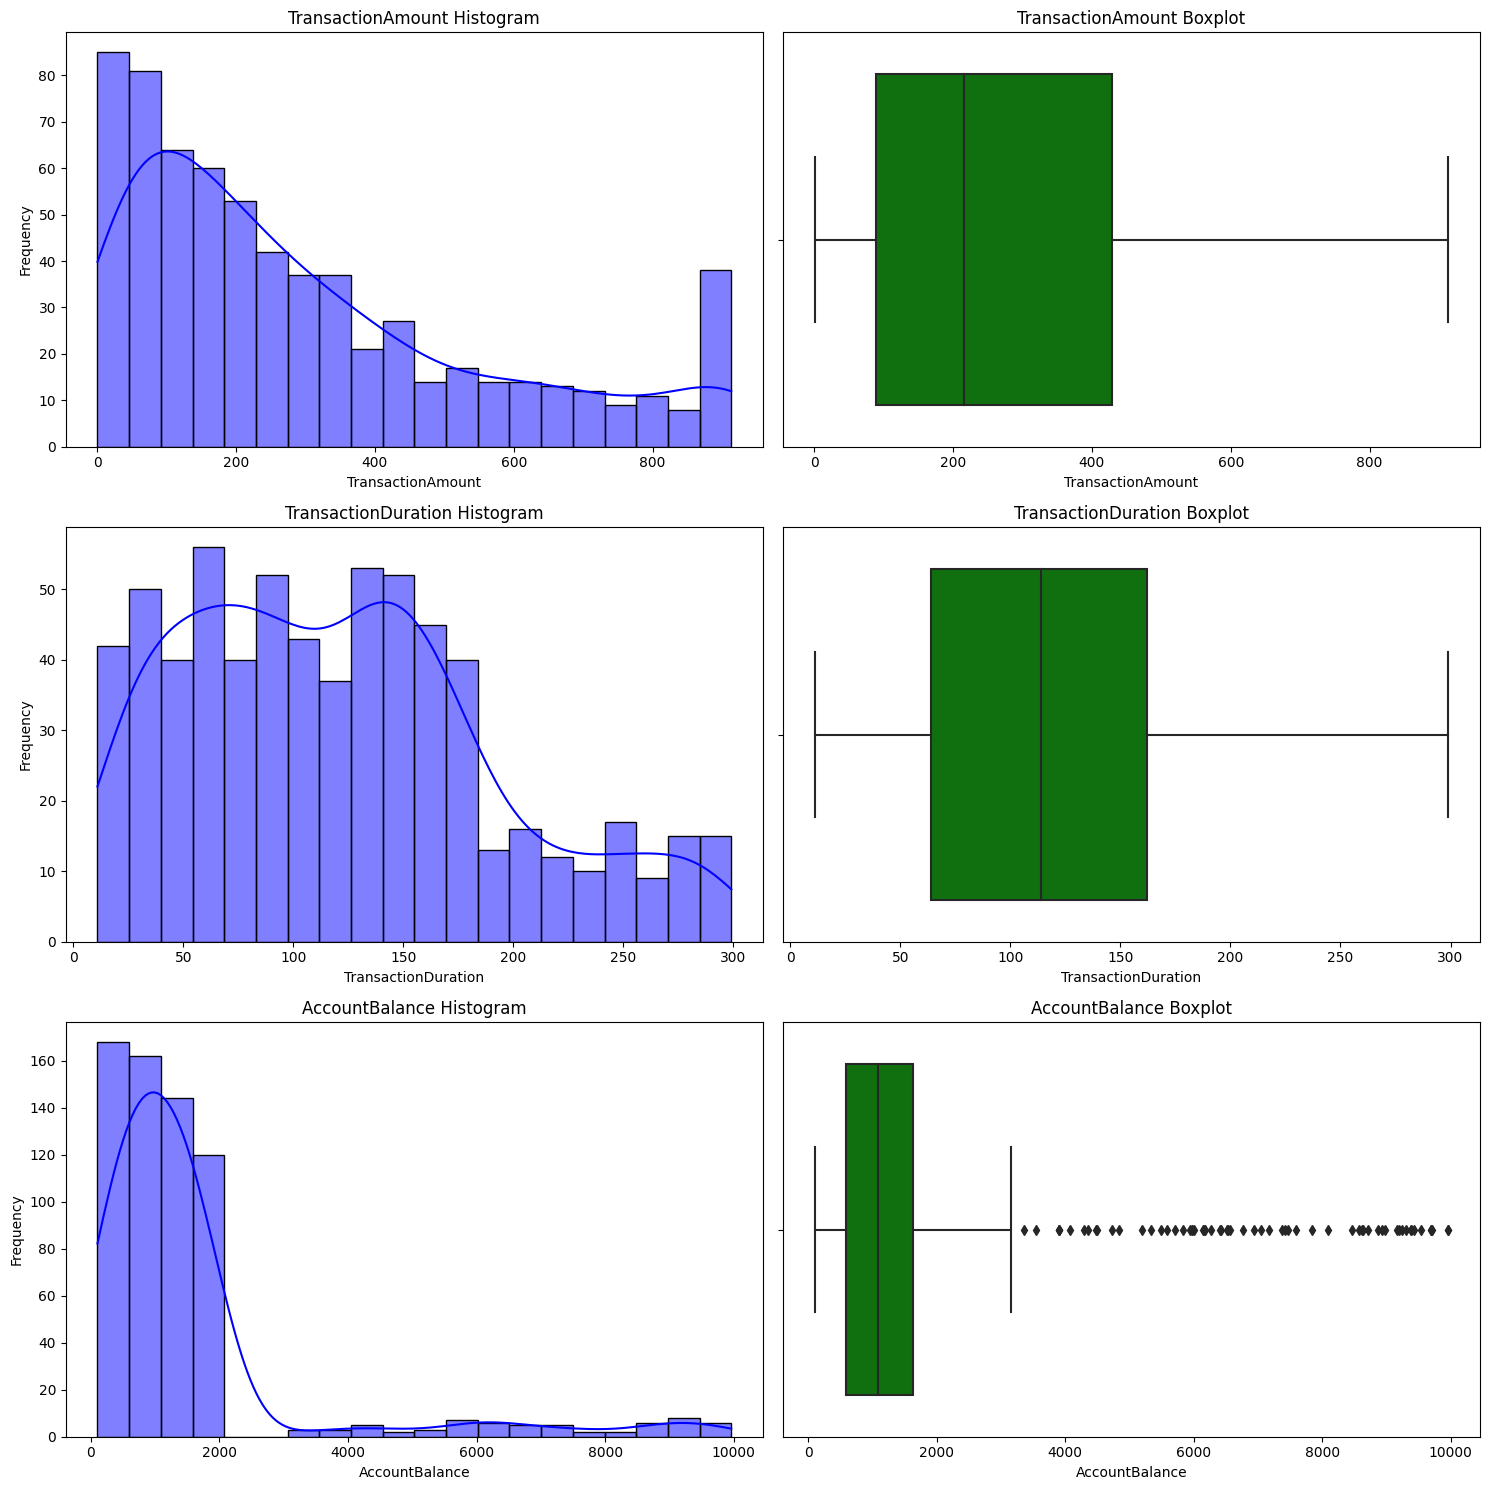

In [50]:
# 'df' veri setini kullanarak "Student" verilerini filtrele
student_data = df[df['CustomerOccupation'] == 'Student']

# Her bir sayısal sütun için grafik oluştur
plt.figure(figsize=(15, len(nums) * 5))
for i, col in enumerate(nums, start=1):
    plt.subplot(len(nums), 2, i*2-1)
    sns.histplot(student_data[col], kde=True, bins=20, color='blue')
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(len(nums), 2, i*2)
    sns.boxplot(x=student_data[col], color='green')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Burda Histogram ve BoxPlot grafiklerine bakıtığımızda öğrencilerin özellikle işlem tutar,işlem süresi,hesap bakiyesi değişkenlerinde normal dağılıma sahip olmadıkları ve hesap bakiyesinde dikkate alınır bir aykırı değer sayısı bariz ortadadır bu durumu daha detaylı incelemek için hesap bakiyesindeki aykırı değer olan verilerin sayısal grafiklerine bakalım.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


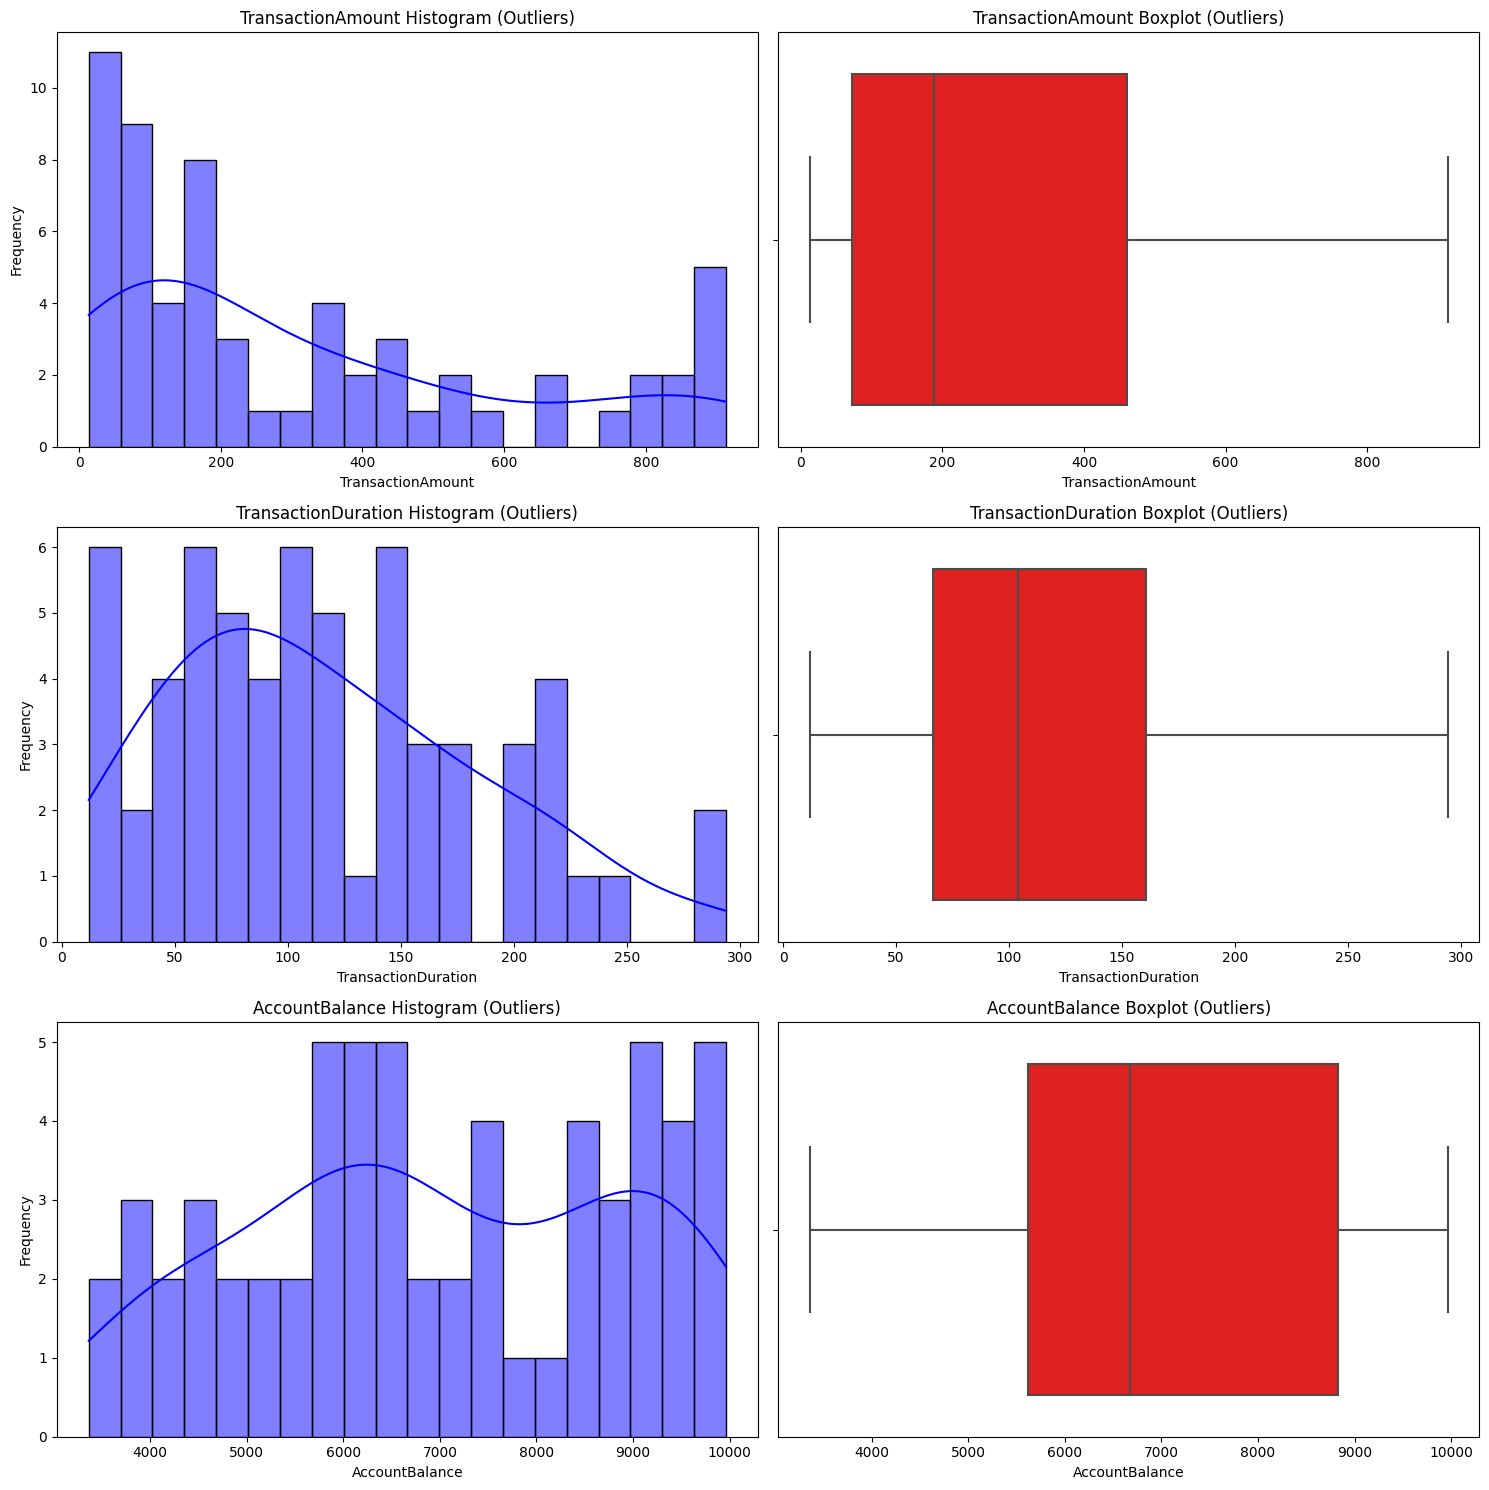

In [51]:

# Aykırı değerleri tespit etmek için IQR yöntemini kullanıyoruz
Q1 = student_data['AccountBalance'].quantile(0.25)
Q3 = student_data['AccountBalance'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer sınırları
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hesap bakiyesinde aykırı değer olan verileri seç
outliers = student_data[student_data['AccountBalance'] > upper_bound]


# Aykırı değerler için sayısal grafikler oluştur
plt.figure(figsize=(15, len(nums) * 5))
for i, col in enumerate(nums, start=1):
    plt.subplot(len(nums), 2, i*2-1)
    sns.histplot(outliers[col], kde=True, bins=20, color='blue')
    plt.title(f'{col} Histogram (Outliers)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(len(nums), 2, i*2)
    sns.boxplot(x=outliers[col], color='red')
    plt.title(f'{col} Boxplot (Outliers)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [52]:
outliers_display = outliers[nums]  # Aykırı değerlerin sadece nums değişkenlerini seçiyoruz
print("Aykırı Değerler:")
print(outliers_display)

Aykırı Değerler:
      TransactionAmount  TransactionDuration  AccountBalance
3                184.50                   25         8569.06
4                 13.45                  198         7429.40
19                71.48                  169         6568.59
73               233.92                  280         6537.62
101               98.54                  167         9383.43
...                 ...                  ...             ...
2407             352.03                  219         4846.68
2444             177.05                  235         4287.82
2474             865.17                  161         9297.50
2478             336.84                  100         4500.26
2498              43.10                  102         6944.90

[62 rows x 3 columns]


**Burda öğrencilerde hesap bakiyesi dağılımında aykırı olan değerleri incelendiğimizde bu değerlerin kendi aralarındaki İşlem tutarı,işlem süresi,hesap bakiyesi,yaşlarının dağılımlarına baktığımızda bu dağılımlarda çoğu normale yakın olmasıyla beraber  işlem süresi normale  çok yakın olması dikkat çekiyor yani hesap bakiyesi belli bir miktarın üstünde  olanlar çoğunlukla aynı sürede işlemlerini tamamlıyor.**

**Aykırı Değerlerin İşlem Türü Ve İşlem Tutarları**

Aykırı Değerlerin İşlem Türlerine Göre Dağılımı:
TransactionType
Credit    15
Debit     47
Name: AccountBalance, dtype: int64


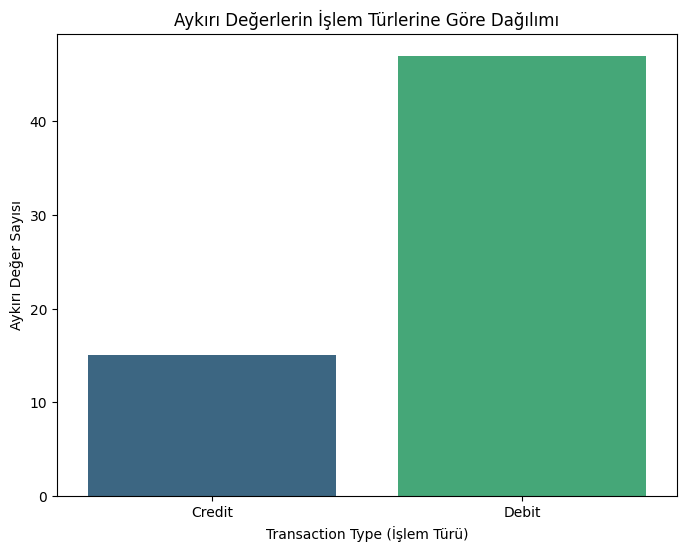


Aykırı Değerlerin İşlem Türlerine Göre Ortalama İşlem Tutarları:
TransactionType
Credit    277.830667
Debit     333.188803
Name: TransactionAmount, dtype: float64


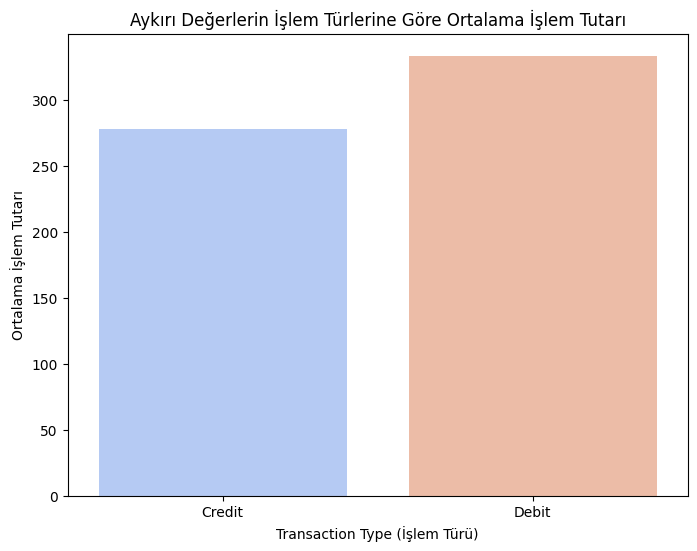

In [53]:
# Aykırı değerlerin hangi işlem türüne ait olduğunu gruplama
outliers_summary = outliers.groupby('TransactionType')['AccountBalance'].count()

# Özet tabloyu yazdır
print("Aykırı Değerlerin İşlem Türlerine Göre Dağılımı:")
print(outliers_summary)

# İşlem türlerine göre dağılımı görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(x=outliers_summary.index, y=outliers_summary.values, palette='viridis')
plt.title('Aykırı Değerlerin İşlem Türlerine Göre Dağılımı')
plt.xlabel('Transaction Type (İşlem Türü)')
plt.ylabel('Aykırı Değer Sayısı')
plt.show()

# Detaylı inceleme: İşlem türüne göre ortalama işlem tutarları
outliers_avg_amount = outliers.groupby('TransactionType')['TransactionAmount'].mean()

print("\nAykırı Değerlerin İşlem Türlerine Göre Ortalama İşlem Tutarları:")
print(outliers_avg_amount)

# Ortalama işlem tutarlarını görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(x=outliers_avg_amount.index, y=outliers_avg_amount.values, palette='coolwarm')
plt.title('Aykırı Değerlerin İşlem Türlerine Göre Ortalama İşlem Tutarı')
plt.xlabel('Transaction Type (İşlem Türü)')
plt.ylabel('Ortalama İşlem Tutarı')
plt.show()


**Öğrencilerde Hesap Bakiyesi Dağılımında Aykırı Değerler Olanların Dağılımları**


Aykırı Değerlerin İşlem Türlerine Göre Dağılımı:
TransactionType
Credit    15
Debit     47
Name: AccountBalance, dtype: int64


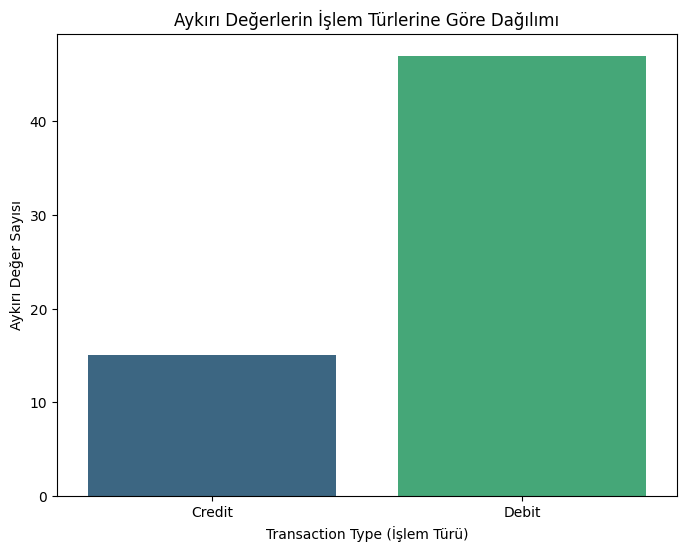

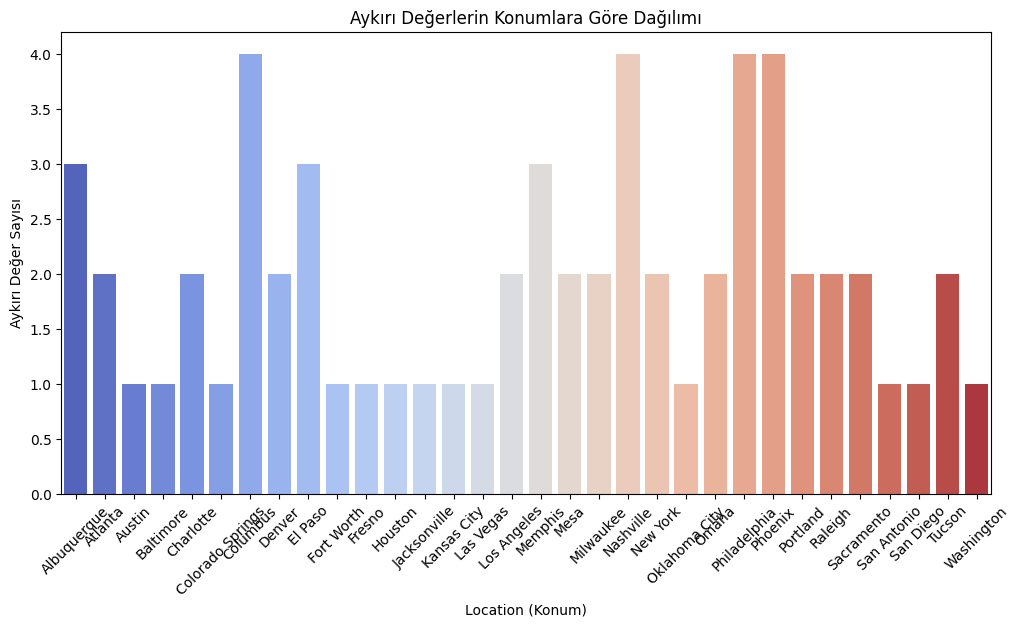


Aykırı Değerlerin Yaşa Göre Dağılımı:
CustomerAge
0-18      9
19-30    53
31-45     0
46-60     0
60+       0
Name: AccountBalance, dtype: int64


/tmp/ipykernel_17/2175599558.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = outliers.groupby(age_bins)['AccountBalance'].count()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


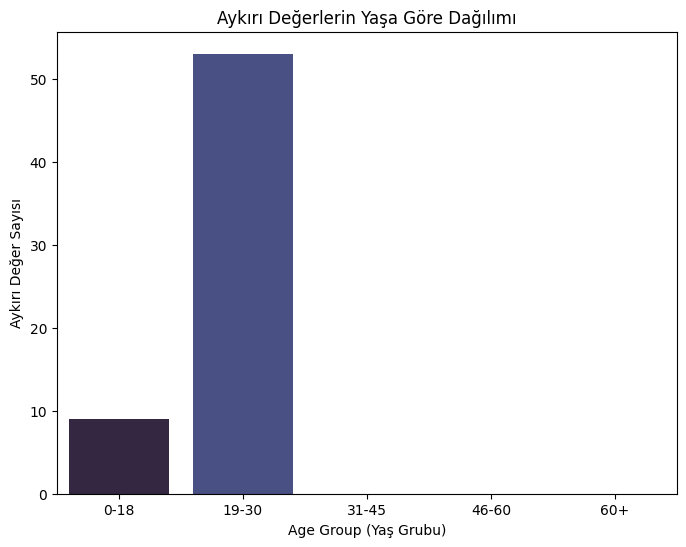


Aykırı Değerlerin Kanallara Göre Dağılımı:
Channel
ATM       18
Branch    23
Online    21
Name: AccountBalance, dtype: int64


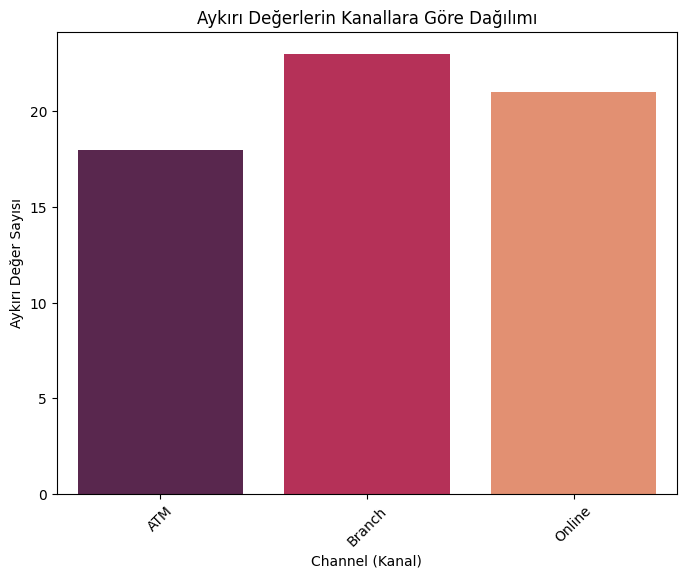


Aykırı Değerlerin İşlem Türü, Konum, Yaş ve Kanal Bazında Detaylı Dağılımı:
    TransactionType     Location AgeGroup Channel  OutlierCount
0            Credit  Albuquerque     0-18     ATM             0
1            Credit  Albuquerque     0-18  Branch             0
2            Credit  Albuquerque     0-18  Online             0
3            Credit  Albuquerque    19-30     ATM             0
4            Credit  Albuquerque    19-30  Branch             0
..              ...          ...      ...     ...           ...
955           Debit   Washington    46-60  Branch             0
956           Debit   Washington    46-60  Online             0
957           Debit   Washington      60+     ATM             0
958           Debit   Washington      60+  Branch             0
959           Debit   Washington      60+  Online             0

[960 rows x 5 columns]


/tmp/ipykernel_17/2175599558.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_summary = outliers.groupby(['TransactionType', 'Location', age_bins, 'Channel'])['AccountBalance'].count().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to a

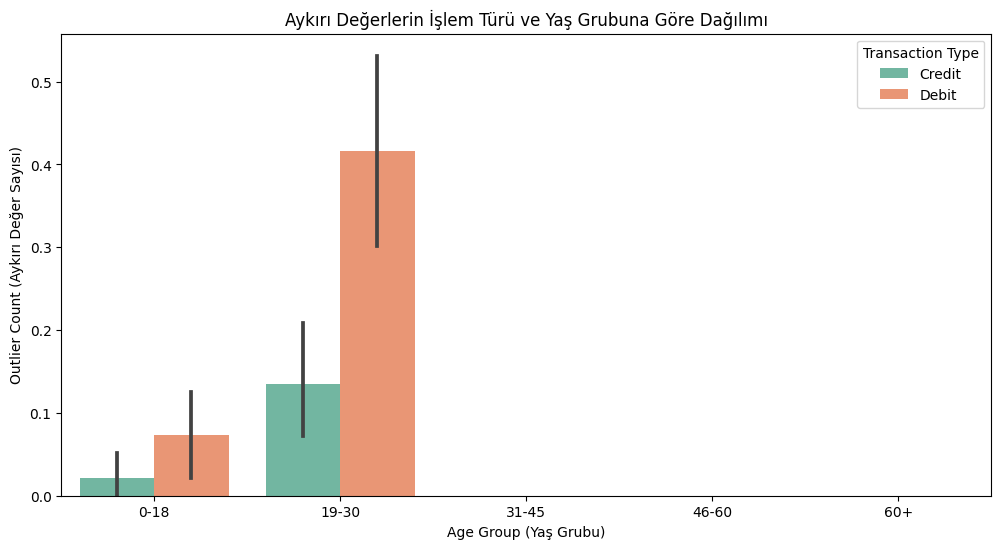

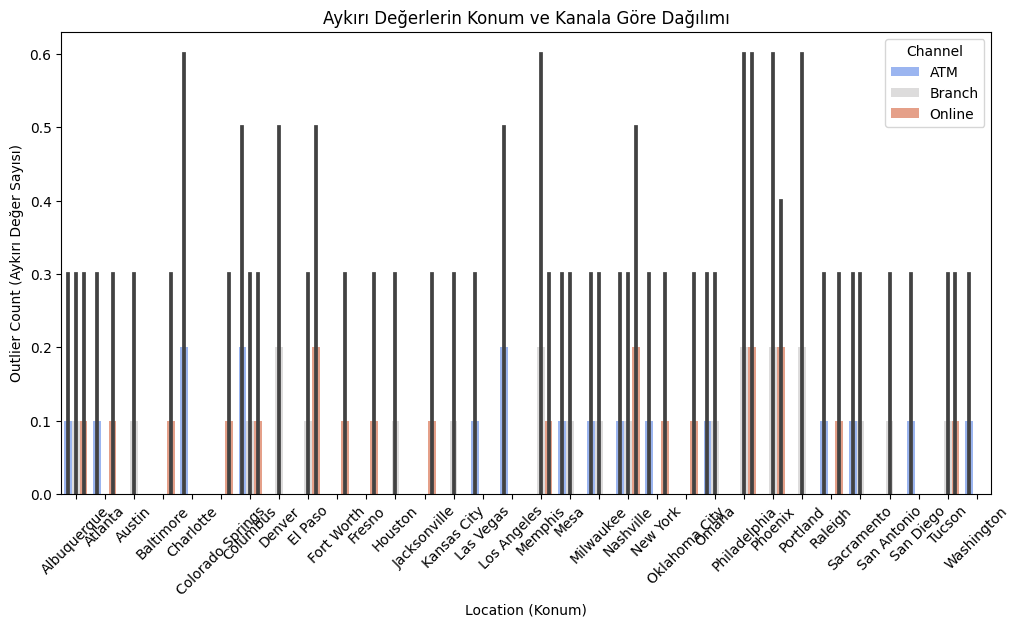

In [54]:
# İşlem Türüne Göre Aykırı Değerlerin Sayısı
transaction_summary = outliers.groupby('TransactionType')['AccountBalance'].count()
print("\nAykırı Değerlerin İşlem Türlerine Göre Dağılımı:")
print(transaction_summary)
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_summary.index, y=transaction_summary.values, palette='viridis')
plt.title('Aykırı Değerlerin İşlem Türlerine Göre Dağılımı')
plt.xlabel('Transaction Type (İşlem Türü)')
plt.ylabel('Aykırı Değer Sayısı')
plt.show()

# Konuma Göre Aykırı Değerlerin Sayısı
location_summary = outliers.groupby('Location')['AccountBalance'].count()
plt.figure(figsize=(12, 6))
sns.barplot(x=location_summary.index, y=location_summary.values, palette='coolwarm')
plt.title('Aykırı Değerlerin Konumlara Göre Dağılımı')
plt.xlabel('Location (Konum)')
plt.ylabel('Aykırı Değer Sayısı')
plt.xticks(rotation=45)
plt.show()

# Yaşa Göre Aykırı Değerlerin Sayısı (Gruplama Yaparak)
age_bins = pd.cut(outliers['CustomerAge'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])
age_summary = outliers.groupby(age_bins)['AccountBalance'].count()
print("\nAykırı Değerlerin Yaşa Göre Dağılımı:")
print(age_summary)
plt.figure(figsize=(8, 6))
sns.barplot(x=age_summary.index, y=age_summary.values, palette='mako')
plt.title('Aykırı Değerlerin Yaşa Göre Dağılımı')
plt.xlabel('Age Group (Yaş Grubu)')
plt.ylabel('Aykırı Değer Sayısı')
plt.show()

# Kanala Göre Aykırı Değerlerin Sayısı
channel_summary = outliers.groupby('Channel')['AccountBalance'].count()
print("\nAykırı Değerlerin Kanallara Göre Dağılımı:")
print(channel_summary)
plt.figure(figsize=(8, 6))
sns.barplot(x=channel_summary.index, y=channel_summary.values, palette='rocket')
plt.title('Aykırı Değerlerin Kanallara Göre Dağılımı')
plt.xlabel('Channel (Kanal)')
plt.ylabel('Aykırı Değer Sayısı')
plt.xticks(rotation=45)
plt.show()

# Genel Görselleştirme İçin Gruplamalar
grouped_summary = outliers.groupby(['TransactionType', 'Location', age_bins, 'Channel'])['AccountBalance'].count().reset_index()
grouped_summary.columns = ['TransactionType', 'Location', 'AgeGroup', 'Channel', 'OutlierCount']
print("\nAykırı Değerlerin İşlem Türü, Konum, Yaş ve Kanal Bazında Detaylı Dağılımı:")
print(grouped_summary)

# İşlem Türü ve Yaş Grubuna Göre Aykırı Değerlerin Görselleştirilmesi
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_summary, x='AgeGroup', y='OutlierCount', hue='TransactionType', palette='Set2')
plt.title('Aykırı Değerlerin İşlem Türü ve Yaş Grubuna Göre Dağılımı')
plt.xlabel('Age Group (Yaş Grubu)')
plt.ylabel('Outlier Count (Aykırı Değer Sayısı)')
plt.legend(title='Transaction Type')
plt.show()

# Konum ve Kanal Bazlı Detaylı Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_summary, x='Location', y='OutlierCount', hue='Channel', palette='coolwarm')
plt.title('Aykırı Değerlerin Konum ve Kanala Göre Dağılımı')
plt.xlabel('Location (Konum)')
plt.ylabel('Outlier Count (Aykırı Değer Sayısı)')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


# ÖĞRENCİLER İÇİN DERİNLEMESİNE ANALİZ

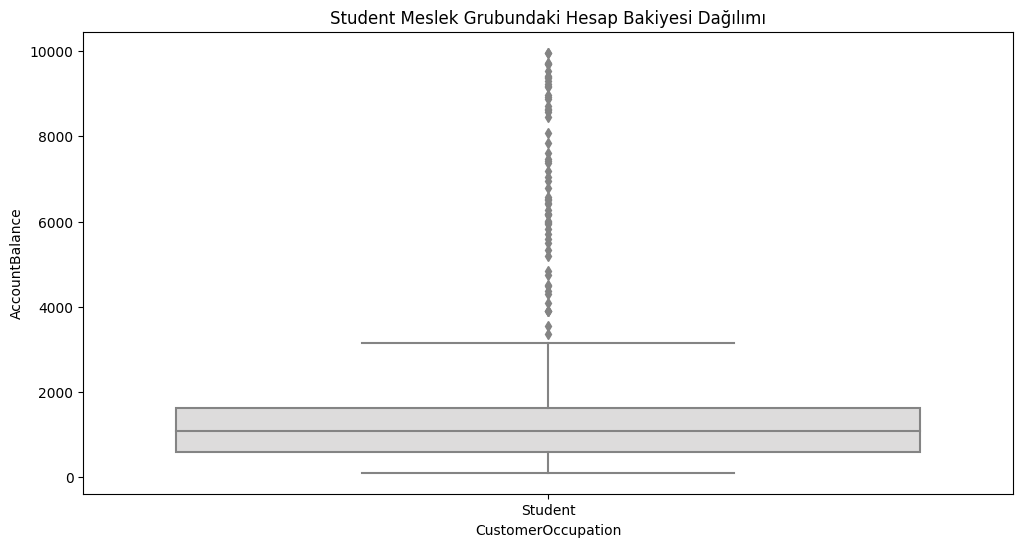

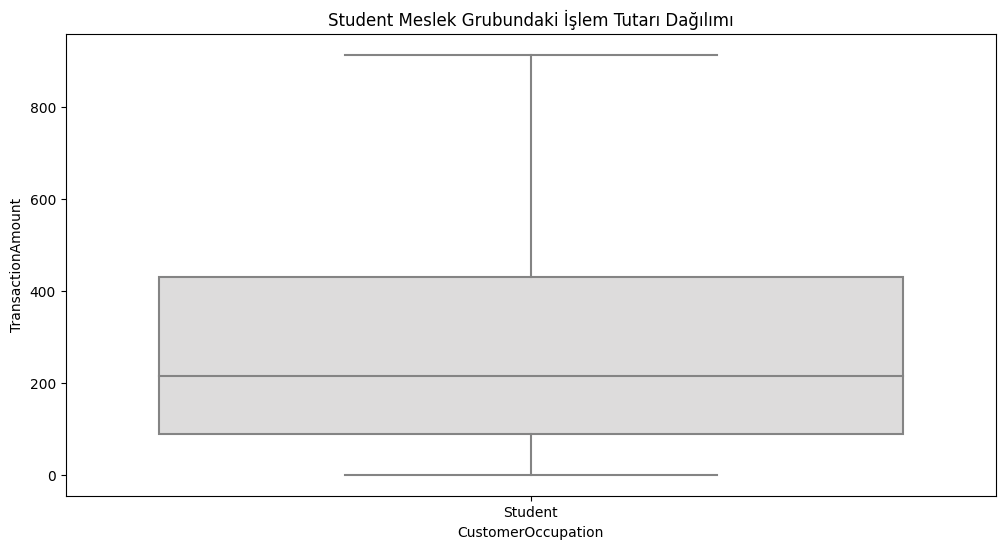

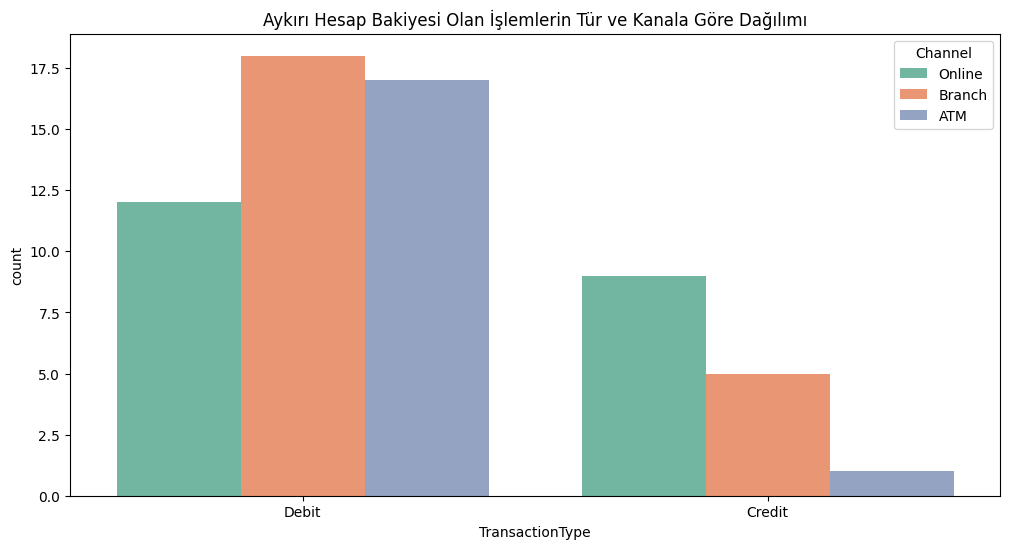

In [55]:

# 1. Student Meslek Grubunu Filtrele
student_data = df[df['CustomerOccupation'] == 'Student']

# 2. Hesap Bakiyesi ve İşlem Tutarları Aykırı Değer Analizi
Q1_balance = student_data['AccountBalance'].quantile(0.25)
Q3_balance = student_data['AccountBalance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance

lower_bound_balance = Q1_balance - 1.5 * IQR_balance
upper_bound_balance = Q3_balance + 1.5 * IQR_balance

Q1_amount = student_data['TransactionAmount'].quantile(0.25)
Q3_amount = student_data['TransactionAmount'].quantile(0.75)
IQR_amount = Q3_amount - Q1_amount

lower_bound_amount = Q1_amount - 1.5 * IQR_amount
upper_bound_amount = Q3_amount + 1.5 * IQR_amount

# Aykırı Değerleri Tespit Et
outliers_balance = student_data[student_data['AccountBalance'] > upper_bound_balance]
outliers_amount = student_data[student_data['TransactionAmount'] > upper_bound_amount]

# 3. Görselleştirme: Hesap Bakiyesi ve İşlem Tutarları
plt.figure(figsize=(12, 6))
sns.boxplot(data=student_data, x='CustomerOccupation', y='AccountBalance', palette="coolwarm")
plt.title("Student Meslek Grubundaki Hesap Bakiyesi Dağılımı")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=student_data, x='CustomerOccupation', y='TransactionAmount', palette="coolwarm")
plt.title("Student Meslek Grubundaki İşlem Tutarı Dağılımı")
plt.show()

# 4. Aykırı Değerlerin İşlem Türü ve Konum Bazında Analizi
plt.figure(figsize=(12, 6))
sns.countplot(data=outliers_balance, x='TransactionType', hue='Channel', palette="Set2")
plt.title("Aykırı Hesap Bakiyesi Olan İşlemlerin Tür ve Kanala Göre Dağılımı")
plt.show()

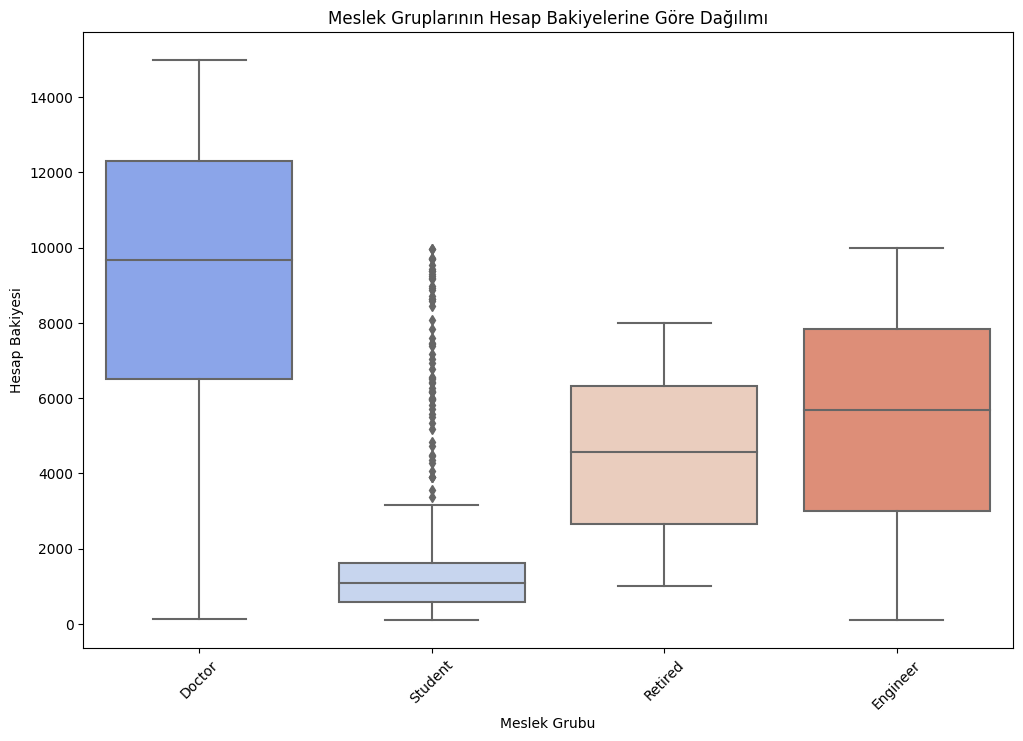

In [56]:
# BoxPlot için Meslek Grubu ve Hesap Bakiyesi
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='CustomerOccupation', y='AccountBalance', palette="coolwarm")
plt.title("Meslek Gruplarının Hesap Bakiyelerine Göre Dağılımı")
plt.xlabel("Meslek Grubu")
plt.ylabel("Hesap Bakiyesi")
plt.xticks(rotation=45)  # Meslek isimlerini düzgün görüntülemek için
plt.show()


# İLİŞKİLER

**Zamana Göre Satın Alma Tutarları Dağımı**

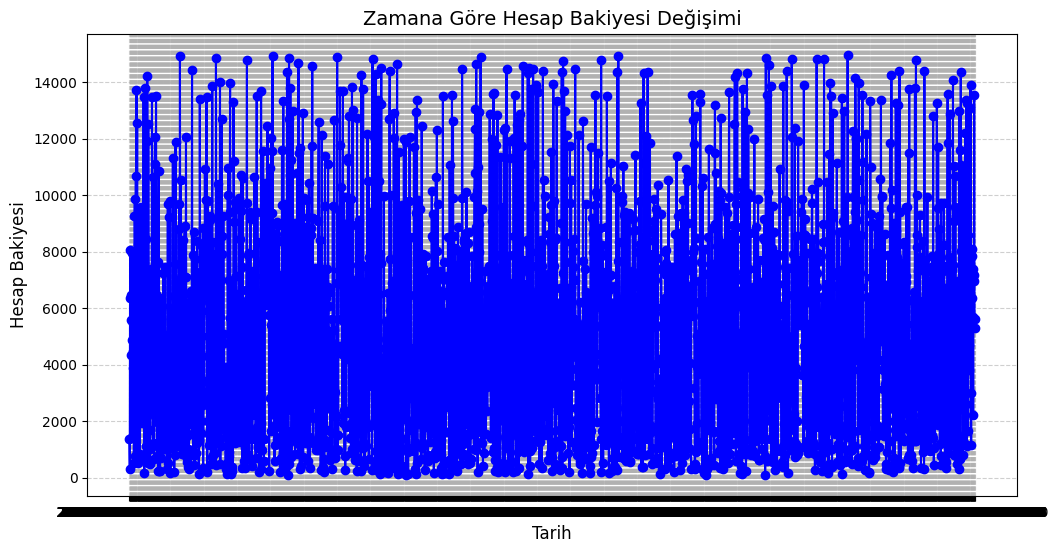

In [57]:
# Tarihe göre sıralama
df = df.sort_values(by='TransactionDate')
# Zaman serisi görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df['TransactionDate'], df['AccountBalance'], marker='o', linestyle='-', color='b')
plt.title("Zamana Göre Hesap Bakiyesi Değişimi", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Hesap Bakiyesi", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Nümerik Değişkenlerin Birbiri Arsındaki Kolerasyon Matrisi**

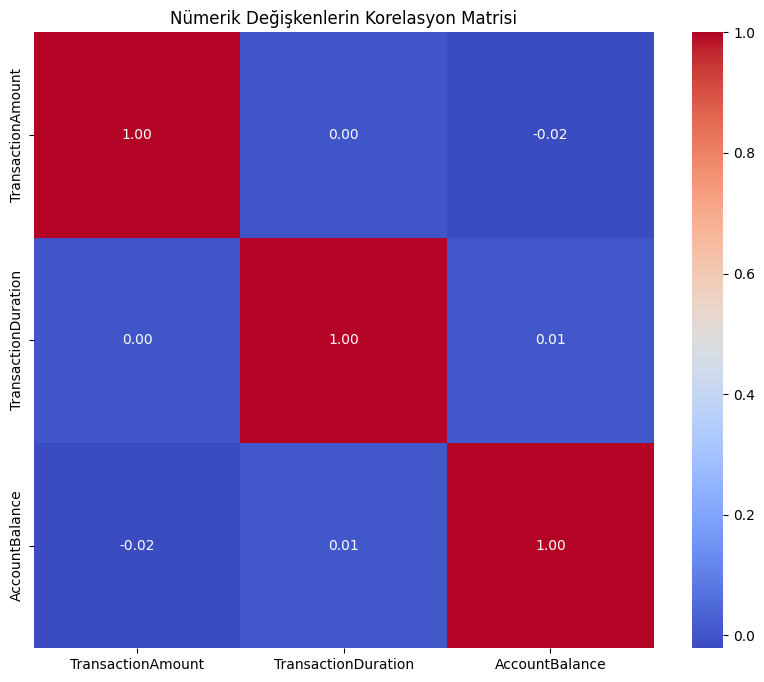

In [58]:
nums_columns = df[nums]
correlation_matrix = nums_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot =True,fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("Nümerik Değişkenlerin Korelasyon Matrisi")
plt.show()

In [59]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
1062,TX001063,AC00456,68.10,2023-01-02 16:00:06,Debit,Milwaukee,D000235,94.227.164.192,M089,ATM,20,Student,47,1,1382.80,2024-11-04 08:10:15
1368,TX001369,AC00316,487.16,2023-01-02 16:01:14,Credit,Los Angeles,D000361,156.96.135.18,M077,Branch,28,Student,84,1,321.21,2024-11-04 08:12:22
1622,TX001623,AC00087,154.21,2023-01-02 16:01:26,Debit,Miami,D000549,190.251.45.32,M083,Online,46,Engineer,75,1,8045.77,2024-11-04 08:10:33
982,TX000983,AC00281,453.49,2023-01-02 16:06:29,Debit,Seattle,D000471,40.226.196.34,M088,Branch,66,Doctor,147,1,6366.43,2024-11-04 08:08:56
876,TX000877,AC00304,204.06,2023-01-02 16:07:17,Debit,Washington,D000685,150.231.20.169,M069,Online,77,Retired,159,1,4351.83,2024-11-04 08:07:22


**KANAL ANALİZİ**

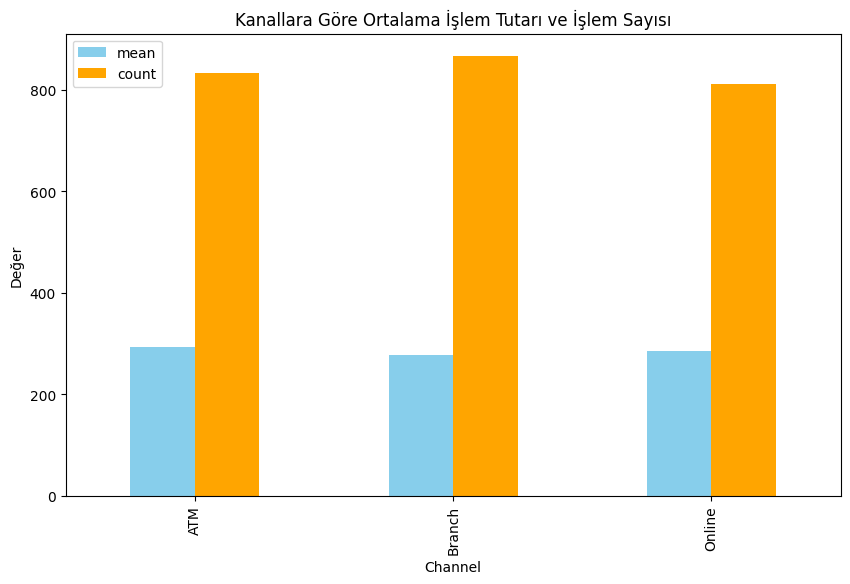

In [60]:
channel_analysis = df.groupby("Channel")['TransactionAmount'].agg(['mean', 'count'])
channel_analysis.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Kanallara Göre Ortalama İşlem Tutarı ve İşlem Sayısı")
plt.xlabel("Channel")
plt.ylabel("Değer")
plt.show()


**LOKASYON IP ANALİZİ**

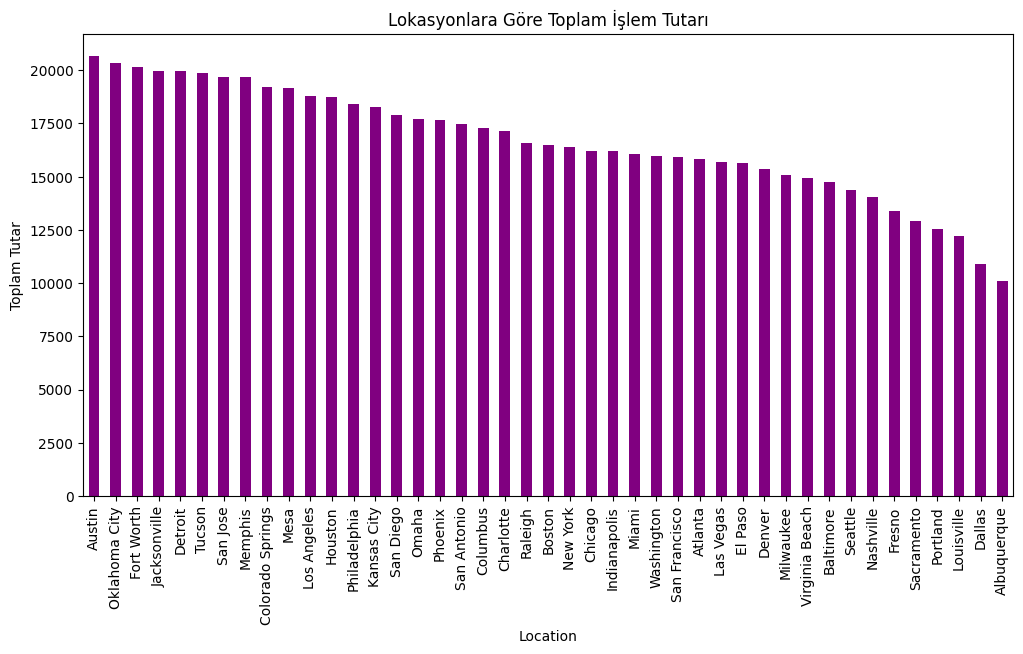

In [61]:
location_analysis = df.groupby("Location")['TransactionAmount'].sum().sort_values(ascending=False)
location_analysis.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title("Lokasyonlara Göre Toplam İşlem Tutarı")
plt.xlabel("Location")
plt.ylabel("Toplam Tutar")
plt.show()


**MÜŞTERİ YAŞI VE MESLEK ANALİZİ**

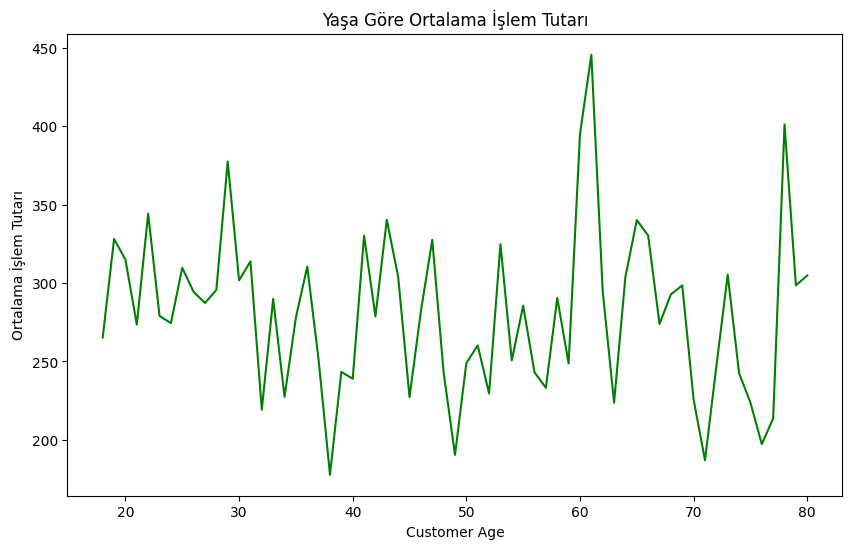

In [62]:
age_analysis = df.groupby("CustomerAge")['TransactionAmount'].mean()
age_analysis.plot(kind='line', figsize=(10, 6), color='green')
plt.title("Yaşa Göre Ortalama İşlem Tutarı")
plt.xlabel("Customer Age")
plt.ylabel("Ortalama İşlem Tutarı")
plt.show()


**SIKLIK ANALİZİ**

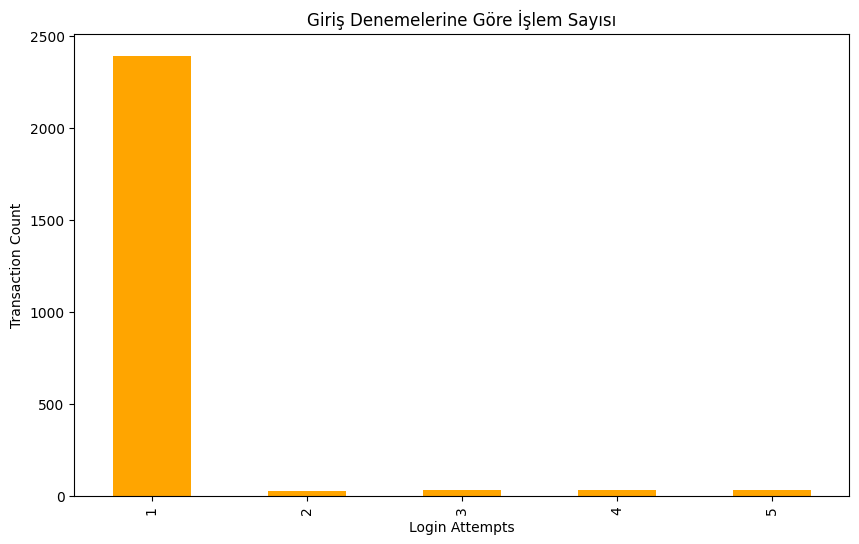

In [63]:
login_attempts_analysis = df.groupby("LoginAttempts")['TransactionAmount'].count()
login_attempts_analysis.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Giriş Denemelerine Göre İşlem Sayısı")
plt.xlabel("Login Attempts")
plt.ylabel("Transaction Count")
plt.show()


**ZAMAN SERİSİ ANALİZİ**

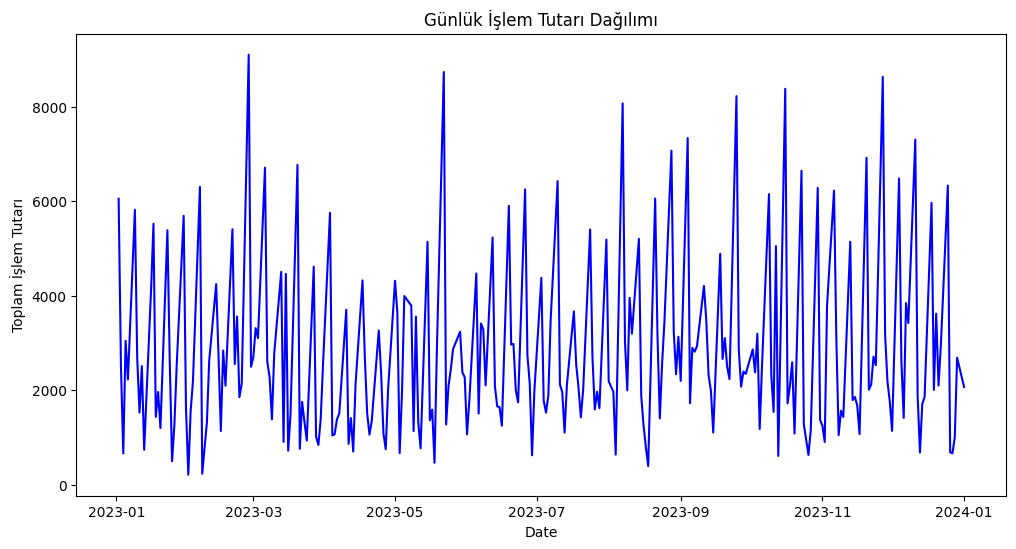

In [64]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
daily_transactions = df.groupby(df['TransactionDate'].dt.date)['TransactionAmount'].sum()
daily_transactions.plot(kind='line', figsize=(12, 6), color='blue')
plt.title("Günlük İşlem Tutarı Dağılımı")
plt.xlabel("Date")
plt.ylabel("Toplam İşlem Tutarı")
plt.show()


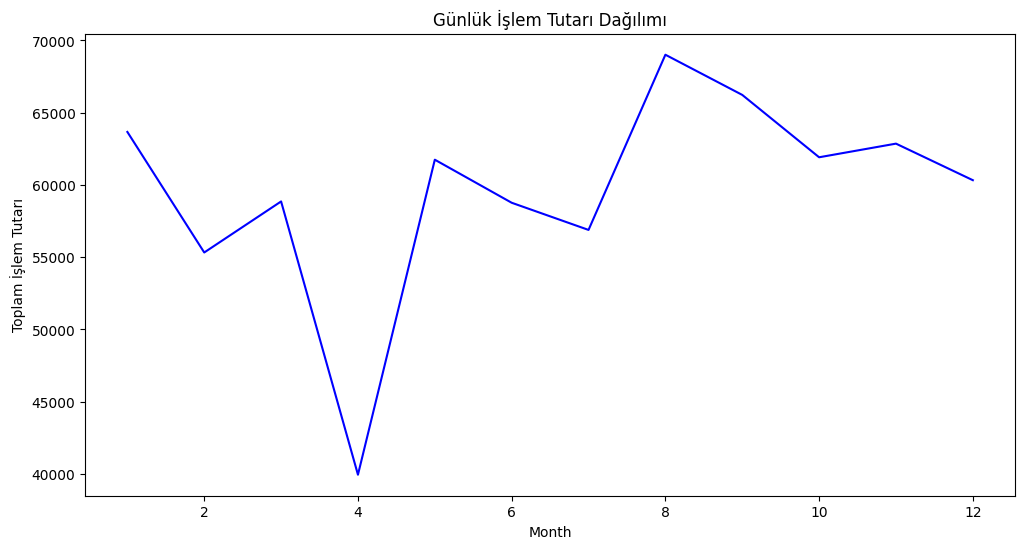

In [65]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
daily_transactions = df.groupby(df['TransactionDate'].dt.month)['TransactionAmount'].sum()
daily_transactions.plot(kind='line', figsize=(12, 6), color='blue')
plt.title("Günlük İşlem Tutarı Dağılımı")
plt.xlabel("Month")
plt.ylabel("Toplam İşlem Tutarı")
plt.show()


# K-MEANS KÜMELEME

1. **Veri Kümelerini Anlama**
K-Means, veri setini belirli sayıda küme (cluster) halinde organize ederek benzer özelliklere sahip veri noktalarını bir araya toplar. Bu, özellikle aşağıdaki durumlarda faydalı olabilir:

   Benzer müşteri gruplarını belirlemek.
   Farklı işlem türlerini ayırmak.
   Aykırı değerleri daha net bir şekilde tespit etmek.
2. **Fraud (Dolandırıcılık) Tespiti**
K-Means, normal işlemler ile anormal (fraud) işlemler arasındaki farkı belirgin hale getirir. Özellikle:

   Anormal işlem kümeleri oluşursa, bu işlemleri daha detaylı inceeledik.
   Düşük hesap bakiyesi ve yüksek işlem tutarına sahip kullanıcılar gibi riskli profilleri tespit ettik.
3. **Görselleştirme ile İlişki Kurma**
K-Means sonuçlarını görselleştirerek:

   TransactionAmount (İşlem Tutarı) ve AccountBalance (Hesap Bakiyesi) gibi değişkenler arasındaki ilişkileri analiz ettik.
   Her kümenin hangi değişkenlerde yoğunlaştığını (örneğin, düşük işlem tutarı, yüksek işlem süresi) daha net gördük..
4. **İşlem Davranışlarını Gruplandırma**
K-Means sonuçları, müşteri davranışlarını anlamak için güçlü bir araçtır:

   Örneğin, ATM'yi daha sık kullanan öğrenciler bir kümede toplanabilir.
   Online işlemleri yoğunlukla kullanan, yüksek işlem tutarına sahip kullanıcılar farklı bir kümede yer alabilir.
5. **Karar Verme Sürecini Kolaylaştırma**
K-Means sonuçları, iş stratejileri geliştirmede kullanılabilir:

Hedeflenebilir müşteri grupları oluşturabilirsiniz.
Fraud işlemleri azaltmak için hangi gruplara daha fazla odaklanmanız gerektiğini belirleyebilirsiniz.
İş süreçlerinizde hangi kanalların (örneğin, Online, ATM) daha fazla risk taşıdığını analiz edebilirsiniz.
Sonuç
**K-Means uygulaması**, veri setindeki karmaşıklığı azaltır ve her bir kümenin özelliklerini anlamanıza yardımcı olur. Özellikle fraud işlemleri tespit etmek ve riskli müşterilere odaklanmak için güçlü bir araçtır. Bu sonuçları kullanarak karar alma süreçlerimizi daha güvenli ve veriye dayalı hale getirdik.

**FRAUD İŞLEM KÜMELERİ**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


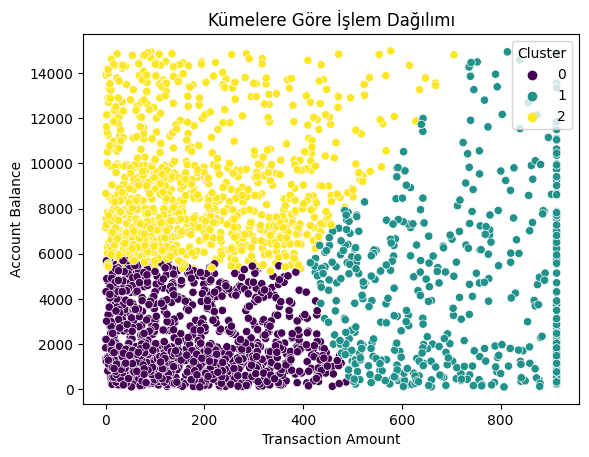

In [66]:

# Veriyi ölçeklendirme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['TransactionAmount', 'TransactionDuration', 'AccountBalance']])

# K-Means uygulama
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Kümeleri görselleştirme
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='Cluster', palette='viridis')
plt.title("Kümelere Göre İşlem Dağılımı")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")
plt.show()


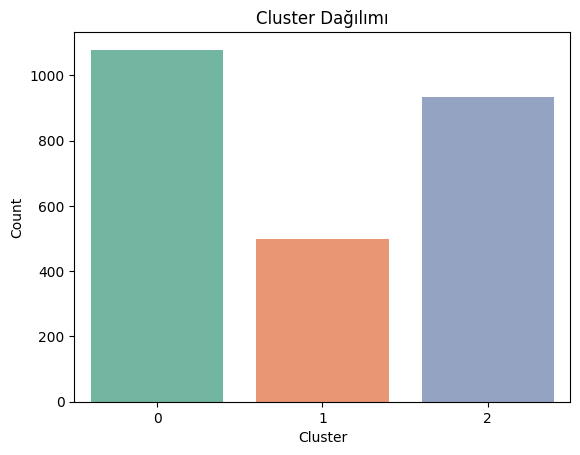

In [67]:
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title("Cluster Dağılımı")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

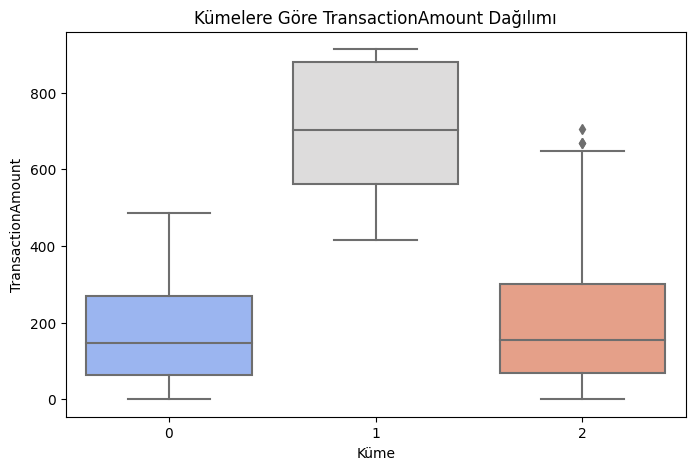

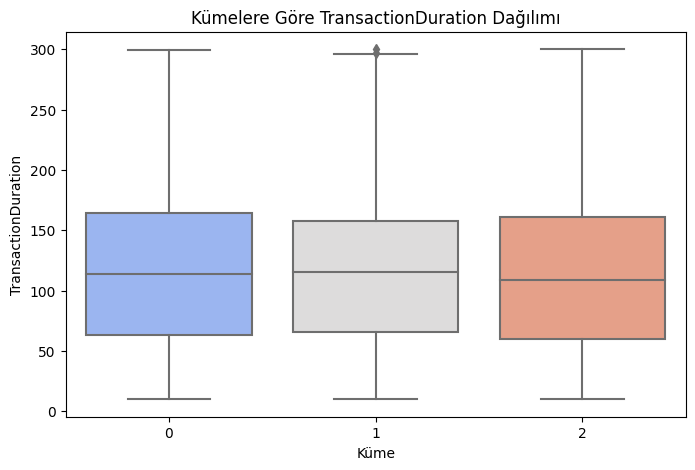

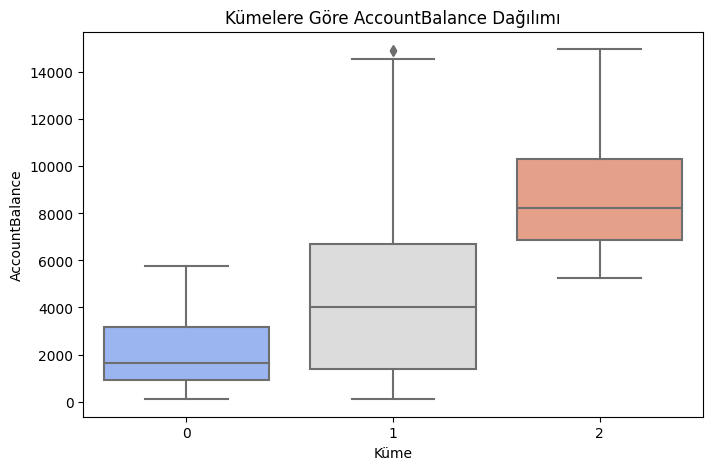

In [68]:
for col in nums:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Cluster', y=col, palette='coolwarm')
    plt.title(f"Kümelere Göre {col} Dağılımı")
    plt.xlabel("Küme")
    plt.ylabel(col)
    plt.show()
